# AUTOSCOUT CAPSTONE PROJECT

<img src=https://i.ibb.co/wJW61Y2/Used-cars.jpg width="700" height="200">

## Introduction
Welcome to "***AutoScout Data Analysis Project***". This is the capstone project of ***Data Analysis*** Module. **Auto Scout** data which using for this project, scraped from the on-line car trading company in 2019, contains many features of 9 different car models. In this project, you will have the opportunity to apply many commonly used algorithms for Data Cleaning and Exploratory Data Analysis by using many Python libraries such as Numpy, Pandas, Matplotlib, Seaborn, Scipy you will analyze clean dataset.

**Some Reminders on Exploratory data analysis (EDA)

Exploratory data analysis (EDA) is an especially important activity in the routine of a data analyst or scientist. It enables an in depth understanding of the dataset, define or discard hypotheses and create predictive models on a solid basis. It uses data manipulation techniques and several statistical tools to describe and understand the relationship between variables and how these can impact business. By means of EDA, we can obtain meaningful insights that can impact analysis under the following questions (If a checklist is good enough for pilots to use every flight, it’s good enough for data scientists to use with every dataset).
1. What question are you trying to solve (or prove wrong)?
2. What kind of data do you have?
3. What’s missing from the data?
4. Where are the outliers?
5. How can you add, change or remove features to get more out of your data?

**``Exploratory data analysis (EDA)``** is often an **iterative brainstorming process** where you pose a question, review the data, and develop further questions to investigate before beginning model development work. The image below shows how the brainstorming phase is connected with that of understanding the variables and how this in turn is connected again with the brainstorming phase.<br>

<img src=https://i.ibb.co/k0MC950/EDA-Process.png width="300" height="100">

[Image Credit: Andrew D.](https://towardsdatascience.com/exploratory-data-analysis-in-python-a-step-by-step-process-d0dfa6bf94ee)

**``In this context, the project consists of 3 parts in general:``**
* **The first part** is related to 'Data Cleaning'. It deals with Incorrect Headers, Incorrect Format, Anomalies, and Dropping useless columns.
* **The second part** is related to 'Filling Data', in other words 'Imputation'. It deals with Missing Values. Categorical to numeric transformation is done as well.
* **The third part** is related to 'Handling Outliers of Data' via Visualization libraries. So, some insights will be extracted.

**``NOTE:``**  However, you are free to create your own style. You do NOT have to stick to the steps above. We, the DA & DV instructors, recommend you study each part separately to create a source notebook for each part title for your further studies. 

## Handling with Missing Values

In [1]:
#Import python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import datetime

import warnings
warnings.filterwarnings("ignore")

plt.rcParams["figure.figsize"] = (12, 8)
pd.set_option('display.max_columns', None)
sns.set_theme(font_scale=1.2, style="darkgrid")
#pd.set_option('display.float_format', lambda x: '%.3' % x)

In [2]:
# Reading file Cleaned CSV
df_origin = pd.read_csv("AutoScout_Cleaned", index_col=[0])
df = df_origin.copy()
df.head().T

,0,1,2,3,4
Model,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1
Body_Type,Sedans,Sedans,Sedans,Sedans,Sedans
Price,15770.0,14500.0,14640.0,14500.0,16790.0
Vat,VAT deductible,Price negotiable,VAT deductible,NaN,NaN
Km,56013.0,80000.0,83450.0,73000.0,16200.0
Registration_Date,2016-01-01,2017-03-01,2016-02-01,2016-08-01,2016-05-01
Prev_Owner,2.0,NaN,1.0,1.0,1.0
Type,Used,Used,Used,Used,Used
Body_Color,Black,Red,Black,Brown,Black
Paint_Type,Metallic,NaN,Metallic,Metallic,Metallic


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15919 entries, 0 to 15918
Data columns (total 38 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 15919 non-null  object 
 1   Body_Type             15860 non-null  object 
 2   Price                 15919 non-null  float64
 3   Vat                   11406 non-null  object 
 4   Km                    14895 non-null  float64
 5   Registration_Date     14322 non-null  object 
 6   Prev_Owner            9279 non-null   float64
 7   Type                  15917 non-null  object 
 8   Body_Color            15338 non-null  object 
 9   Paint_Type            10147 non-null  object 
 10  Door_Total            15707 non-null  float64
 11  Seat_Total            14942 non-null  float64
 12  Gear_Type             15919 non-null  object 
 13  Cylinders             10239 non-null  float64
 14  Weight                8945 non-null   float64
 15  Drive_Chain        

In [4]:
#Getting date columns to datetime format
df["Registration_Date"] = pd.to_datetime(df["Registration_Date"])
df["Inspection_Time"] = pd.to_datetime(df["Inspection_Time"])

In [5]:
df.duplicated().value_counts()

False    14433
True      1486
dtype: int64

In [6]:
#Dropping duplicates
#df[df.duplicated(keep=False)]
df.drop_duplicates(inplace=True)

In [7]:
#There is no full nan values in rows
df.isnull().all(axis=1).any()

False

In [8]:
#Looking NaN values percentage in dataset
for i in df.columns:
    print(f"Null values in {i} column is =  %", round(df[i].isnull().sum()/df.shape[0]*100,2))

Null values in Model column is =  % 0.0
Null values in Body_Type column is =  % 0.32
Null values in Price column is =  % 0.0
Null values in Vat column is =  % 27.77
Null values in Km column is =  % 6.23
Null values in Registration_Date column is =  % 9.54
Null values in Prev_Owner column is =  % 40.58
Null values in Type column is =  % 0.01
Null values in Body_Color column is =  % 3.55
Null values in Paint_Type column is =  % 35.29
Null values in Door_Total column is =  % 0.98
Null values in Seat_Total column is =  % 5.98
Null values in Gear_Type column is =  % 0.0
Null values in Cylinders column is =  % 34.84
Null values in Weight column is =  % 44.1
Null values in Drive_Chain column is =  % 43.73
Null values in Fuel column is =  % 0.0
Null values in Emission_Class column is =  % 18.08
Null values in Comfort_Convenience column is =  % 5.32
Null values in Entertainment_Media column is =  % 8.01
Null values in Extras column is =  % 17.79
Null values in Safety_Security column is =  % 5.6

In [9]:
#Dropping LastServiceTime column because of it's null percentage
df.drop(columns="LastServiceTime", inplace=True)

In [10]:
#Getting car Age values from Registration Date
df["Age"] = (2019 - df["Registration_Date"].dt.year)

In [11]:
#Filling NaN values with function. Very useful for categorical or discrete numeric values
def fillna_with1column(Dataframe:pd.DataFrame, column1, columnNA, method):
    print("Number of NaN Before ModeFunction: ",Dataframe[columnNA].isnull().sum())
    print(Dataframe[columnNA].value_counts(dropna=False))
    print("------------------")
    if method == "mode":
        for values in list(Dataframe[column1].unique()):
            condition = (Dataframe[column1] == values)
            mode = list(Dataframe[condition][columnNA].mode())
            if mode != []:
                Dataframe.loc[condition,columnNA] = Dataframe.loc[condition,columnNA].fillna(Dataframe[condition][columnNA].mode()[0])
            else:
                Dataframe.loc[condition,columnNA] = Dataframe.loc[condition,columnNA].fillna(Dataframe[columnNA].mode()[0])
    
    elif method == "ffill":
        for values in list(Dataframe[column1].unique()):
            condition = (Dataframe[column1] == values)
            Dataframe.loc[condition,columnNA] = Dataframe.loc[condition,columnNA].fillna(method="ffill").fillna(method="bfill")
        Dataframe[columnNA] = Dataframe[columnNA].fillna(method="ffill").fillna(method="bfill")
    
    elif method == "bfill":
        for values in list(Dataframe[column1].unique()):
            condition = (Dataframe[column1] == values)
            Dataframe.loc[condition,columnNA] = Dataframe.loc[condition,columnNA].fillna(method="bfill").fillna(method="ffill")
        Dataframe[columnNA] = Dataframe[columnNA].fillna(method="bfill").fillna(method="ffill")
    
    elif method == "mean":
         Dataframe[columnNA] = Dataframe[columnNA].fillna(Dataframe.groupby(column1)[columnNA].transform("mean"))
        
    print("Number of NaN After Mode Function: ",Dataframe[columnNA].isnull().sum())
    print(Dataframe[columnNA].value_counts(dropna=False))
    print("------------------")

In [12]:
#Filling NaN values according to 2 columns with mode or median or ffill or mean.

def fillna_with2column(Dataframe:pd.DataFrame, column1, column2, columnNA, method): 
    print(f"Number of NaN Before {method} Function: ",Dataframe[columnNA].isnull().sum())
    print(Dataframe[columnNA].value_counts(dropna=False))
    print("------------------")
    if method == "mode":
        for values1 in list(Dataframe[column1].unique()):
            for values2 in list(Dataframe[column2].unique()):
                cond1 = (Dataframe[column1]==values1)
                cond2 = (Dataframe[column1]==values1) & (Dataframe[column2]==values2)
                mode1 = list(Dataframe[cond1][columnNA].mode())
                mode2 = list(Dataframe[cond2][columnNA].mode())
                if mode2 != []:
                    Dataframe.loc[cond2,columnNA]= Dataframe.loc[cond2,columnNA].fillna(Dataframe[cond2][columnNA].mode()[0]).fillna(Dataframe[cond1][columnNA].mode()[0])
                elif mode1 != []:
                    Dataframe.loc[cond1,columnNA]= Dataframe.loc[cond1,columnNA].fillna(Dataframe[cond1][columnNA].mode()[0])
                else:
                    Dataframe.loc[cond2,columnNA] = Dataframe.loc[cond2,columnNA].fillna(Dataframe[columnNA].mode()[0])

    elif method == "median":
        for values1 in list(Dataframe[column1].unique()):
            for values2 in list(Dataframe[column2].unique()):
                cond1 = (Dataframe[column1]==values1)
                cond2 = (Dataframe[column2]==values2) & (Dataframe[column1]==values1)
                Dataframe.loc[cond2,columnNA]= Dataframe.loc[cond2,columnNA].fillna(Dataframe[cond2][columnNA].median()).fillna(Dataframe[cond1][columnNA].median()).fillna(Dataframe[columnNA].median())
                
    elif method == "ffill":           
        for values1 in list(Dataframe[column1].unique()):
            for values2 in list(Dataframe[column2].unique()):
                cond2 = (Dataframe[column1]==values1) & (Dataframe[column2]==values2)
                Dataframe.loc[cond2,columnNA]= Dataframe.loc[cond2,columnNA].fillna(method="ffill").fillna(method="bfill")
                
        for values1 in list(Dataframe[column1].unique()):
            cond1 = (Dataframe[column1]==values1)
            Dataframe.loc[cond1,columnNA]= Dataframe.loc[cond1,columnNA].fillna(method="ffill").fillna(method="bfill")    
           
        Dataframe[columnNA] = Dataframe[columnNA].fillna(method="ffill").fillna(method="bfill")
    
    elif method == "bfill":           
        for values1 in list(Dataframe[column1].unique()):
            for values2 in list(Dataframe[column2].unique()):
                cond2 = (Dataframe[column1]==values1) & (Dataframe[column2]==values2)
                Dataframe.loc[cond2,columnNA]= Dataframe.loc[cond2,columnNA].fillna(method="bfill").fillna(method="ffill")
                
        for values1 in list(Dataframe[column1].unique()):
            cond1 = (Dataframe[column1]==values1)
            Dataframe.loc[cond1,columnNA]= Dataframe.loc[cond1,columnNA].fillna(method="bfill").fillna(method="ffill")        
           
        Dataframe[columnNA] = Dataframe[columnNA].fillna(method="bfill").fillna(method="ffill")
    
    elif method == "mean":
        Dataframe[columnNA] = Dataframe[columnNA].fillna(Dataframe.groupby([column1,column2])[columnNA].transform("mean"))
        
    print(f"Number of NaN After {method} Function: ",Dataframe[columnNA].isnull().sum())
    print(Dataframe[columnNA].value_counts(dropna=False))
    print("------------------")

In [13]:
#Filling NaN values according to 3 columns with mode, median or mean.

def fillna_with3column(Dataframe:pd.DataFrame, column1, column2,column3, columnNA, method): 
    print(f"Number of NaN Before {method} Function: ",Dataframe[columnNA].isnull().sum())
    print(Dataframe[columnNA].value_counts(dropna=False))
    print("------------------")
    if method == "mode":
        for values1 in list(Dataframe[column1].unique()):
            for values2 in list(Dataframe[column2].unique()):
                for values3 in list(Dataframe[column3].unique()):

                    cond1 = (Dataframe[column1]==values1)
                    cond2 = (Dataframe[column1]==values1) & (Dataframe[column2]==values2)
                    cond3 = (Dataframe[column1]==values1) & (Dataframe[column2]==values2) & (Dataframe[column3]==values3)
                    mode1 = list(Dataframe[cond1][columnNA].mode())
                    mode2 = list(Dataframe[cond2][columnNA].mode())
                    mode3 = list(Dataframe[cond3][columnNA].mode())
                    
                    if mode3 != []:
                        Dataframe.loc[cond3,columnNA]= Dataframe.loc[cond3,columnNA].fillna(Dataframe[cond3][columnNA].mode()[0]).fillna(Dataframe[cond2][columnNA].mode()[0]).fillna(Dataframe[cond1][columnNA].mode()[0])
                    elif mode2 != []:
                        Dataframe.loc[cond2,columnNA]= Dataframe.loc[cond2,columnNA].fillna(Dataframe[cond2][columnNA].mode()[0]).fillna(Dataframe[cond1][columnNA].mode()[0])
                    elif mode1 != []:
                        Dataframe.loc[cond1,columnNA]= Dataframe.loc[cond1,columnNA].fillna(Dataframe[cond1][columnNA].mode()[0])
                    else:
                        Dataframe.loc[cond2,columnNA] = Dataframe.loc[cond2,columnNA].fillna(Dataframe[columnNA].mode()[0])
    
    elif method == "median":
        for values1 in list(Dataframe[column1].unique()):
            for values2 in list(Dataframe[column2].unique()):
                for values3 in list(Dataframe[column3].unique()):
                
                    cond1 = (Dataframe[column1]==values1)
                    cond2 = (Dataframe[column2]==values2) & (Dataframe[column1]==values1)
                    cond3 = (Dataframe[column1]==values1) & (Dataframe[column2]==values2) & (Dataframe[column3]==values3)
                    Dataframe.loc[cond3,columnNA]= Dataframe.loc[cond3,columnNA].fillna(Dataframe[cond3][columnNA].median()).fillna(Dataframe[cond2][columnNA].median()).fillna(Dataframe[cond1][columnNA].median()).fillna(Dataframe[columnNA].median())
    
    elif method == "mean":
        Dataframe[columnNA] = Dataframe[columnNA].fillna(Dataframe.groupby([column1,column2,column3])[columnNA].transform("mean"))
    print(f"Number of NaN After {method} Function: ",Dataframe[columnNA].isnull().sum())
    print(Dataframe[columnNA].value_counts(dropna=False))
    print("------------------")           
            
        

### Target Feature - Price 

In [14]:
df.Price.describe()

count    14433.000000
mean     18121.672279
std       7425.909096
min         13.000000
25%      12950.000000
50%      16950.000000
75%      21900.000000
max      74600.000000
Name: Price, dtype: float64

In [15]:
df.Price.isnull().sum()

0

<AxesSubplot:xlabel='Price', ylabel='Count'>

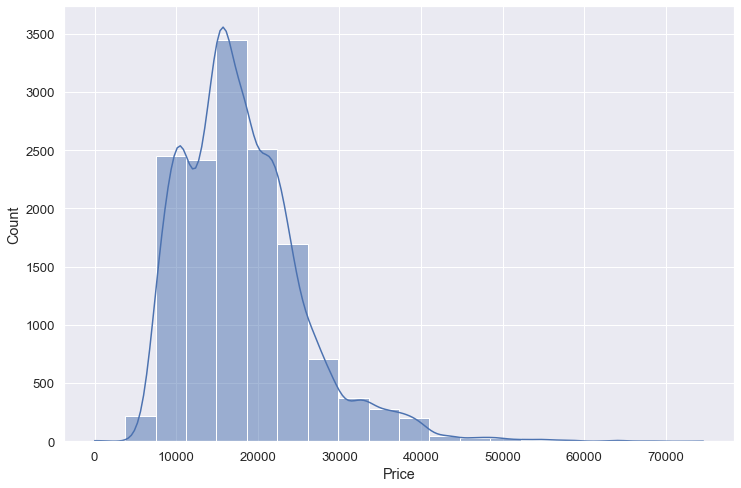

In [16]:
sns.histplot(x="Price", data=df, bins=20, kde=True)

In [17]:
#Getting price intervals for handling with missing values
df["Price_Interval"] = pd.cut(df["Price"],[0,10000,15000,20000,25000,30000,80000])
df["Price_Interval"].value_counts()

(15000, 20000]    4255
(10000, 15000]    3513
(20000, 25000]    2816
(0, 10000]        1887
(25000, 30000]    1060
(30000, 80000]     902
Name: Price_Interval, dtype: int64

### Numerical Features 

In [18]:
df.select_dtypes(exclude="O").info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14433 entries, 0 to 15918
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Price                 14433 non-null  float64       
 1   Km                    13534 non-null  float64       
 2   Registration_Date     13056 non-null  datetime64[ns]
 3   Prev_Owner            8576 non-null   float64       
 4   Door_Total            14292 non-null  float64       
 5   Seat_Total            13570 non-null  float64       
 6   Cylinders             9404 non-null   float64       
 7   Weight                8068 non-null   float64       
 8   Emission_Label        7310 non-null   float64       
 9   Gears                 10228 non-null  float64       
 10  Consumption_Comb      12615 non-null  float64       
 11  Consumption_City      12148 non-null  float64       
 12  Consumption_Country   12208 non-null  float64       
 13  Hp              

In [19]:
#Looking NaN values in numerical features
for i in df.select_dtypes(exclude="O").columns:
    print(f"Null values in {i} column is =  %", round(df[i].isnull().sum()/df.shape[0]*100,2))

Null values in Price column is =  % 0.0
Null values in Km column is =  % 6.23
Null values in Registration_Date column is =  % 9.54
Null values in Prev_Owner column is =  % 40.58
Null values in Door_Total column is =  % 0.98
Null values in Seat_Total column is =  % 5.98
Null values in Cylinders column is =  % 34.84
Null values in Weight column is =  % 44.1
Null values in Emission_Label column is =  % 49.35
Null values in Gears column is =  % 29.13
Null values in Consumption_Comb column is =  % 12.6
Null values in Consumption_City column is =  % 15.83
Null values in Consumption_Country column is =  % 15.42
Null values in Hp column is =  % 0.58
Null values in Particulate_Filter column is =  % 0.0
Null values in Inspection_Time column is =  % 77.32
Null values in Inspection_Situation column is =  % 0.0
Null values in Warranty column is =  % 70.16
Null values in Emission column is =  % 15.6
Null values in Engine_Size column is =  % 1.07
Null values in Age column is =  % 9.54
Null values in 

In [20]:
df.describe(exclude="O").T

,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
Price,14433.0,NaN,NaN,NaN,NaT,NaT,18121.672279,7425.909096,13.0,12950.0,16950.0,21900.0,74600.0
Km,13534.0,NaN,NaN,NaN,NaT,NaT,34009.380597,37114.742058,0.0,5991.25,22692.0,49000.0,317000.0
Registration_Date,13056,47,2018-03-01 00:00:00,664,2016-01-01,2019-12-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Prev_Owner,8576.0,NaN,NaN,NaN,NaT,NaT,1.058186,0.320707,0.0,1.0,1.0,1.0,4.0
Door_Total,14292.0,NaN,NaN,NaN,NaT,NaT,4.655682,0.643762,1.0,4.0,5.0,5.0,7.0
Seat_Total,13570.0,NaN,NaN,NaN,NaT,NaT,4.947605,0.475019,2.0,5.0,5.0,5.0,7.0
Cylinders,9404.0,NaN,NaN,NaN,NaT,NaT,3.794236,0.418752,1.0,4.0,4.0,4.0,8.0
Weight,8068.0,NaN,NaN,NaN,NaT,NaT,1354.579202,224.256342,1.0,1170.0,1293.0,1487.0,2471.0
Emission_Label,7310.0,NaN,NaN,NaN,NaT,NaT,3.846512,0.677996,1.0,4.0,4.0,4.0,5.0
Gears,10228.0,NaN,NaN,NaN,NaT,NaT,5.923739,0.856504,1.0,5.0,6.0,6.0,50.0


In [21]:
df.select_dtypes(exclude="O").corr().abs()

,Price,Km,Prev_Owner,Door_Total,Seat_Total,Cylinders,Weight,Emission_Label,Gears,Consumption_Comb,Consumption_City,Consumption_Country,Hp,Particulate_Filter,Inspection_Situation,Warranty,Emission,Engine_Size,Age
Price,1.000000,0.388292,0.126587,0.158224,0.247672,0.008582,0.413675,0.096448,0.481410,0.157923,0.158043,0.194474,0.696250,0.064699,0.002465,0.191182,0.311688,0.219808,0.453293
Km,0.388292,1.000000,0.075815,0.003245,0.010406,0.213879,0.171147,0.064324,0.040033,0.198648,0.231761,0.230631,0.022857,0.262649,0.030489,0.286070,0.200954,0.269350,0.725953
Prev_Owner,0.126587,0.075815,1.000000,0.141950,0.019246,0.058725,0.055103,0.004795,0.025948,0.049316,0.046810,0.075869,0.012555,0.003630,0.060878,0.058192,0.011646,0.018833,0.217153
Door_Total,0.158224,0.003245,0.141950,1.000000,0.113372,0.074362,0.166056,0.095722,0.095083,0.021066,0.050252,0.015584,0.122280,0.030392,0.117980,0.025780,0.036187,0.066608,0.082749
Seat_Total,0.247672,0.010406,0.019246,0.113372,1.000000,0.250920,0.309875,0.013023,0.089607,0.128277,0.126942,0.141864,0.291104,0.044303,0.005726,0.068714,0.247853,0.174447,0.089357
Cylinders,0.008582,0.213879,0.058725,0.074362,0.250920,1.000000,0.269336,0.039168,0.134874,0.077573,0.098501,0.074251,0.310986,0.160111,0.033631,0.199095,0.332920,0.618450,0.150459
Weight,0.413675,0.171147,0.055103,0.166056,0.309875,0.269336,1.000000,0.021322,0.305033,0.027281,0.001840,0.035053,0.582621,0.225370,0.014202,0.022966,0.267368,0.563242,0.075889
Emission_Label,0.096448,0.064324,0.004795,0.095722,0.013023,0.039168,0.021322,1.000000,0.139666,0.060375,0.110966,0.029298,0.048971,0.034353,0.166477,0.077223,0.091552,0.014501,0.101780
Gears,0.481410,0.040033,0.025948,0.095083,0.089607,0.134874,0.305033,0.139666,1.000000,0.000805,0.017116,0.020737,0.421235,0.185083,0.013046,0.016127,0.124622,0.274915,0.089741
Consumption_Comb,0.157923,0.198648,0.049316,0.021066,0.128277,0.077573,0.027281,0.060375,0.000805,1.000000,0.873565,0.904813,0.205839,0.190706,0.057788,0.074583,0.521212,0.012199,0.224103


In [22]:
def numeric_look(column1):
    print("----DESCRIBE : --------")
    print(df[column1].describe())
    print("----TOTAL NULL : --------")
    print(df[column1].isnull().sum())
    print("----PERCENTAGE OF NULL : --------")
    print("%",round(df[column1].isnull().sum() / df.shape[0]*100, 2))
    print("----CORELATION : --------")
    print(df.corr()[column1].abs())
    print("----VALUE COUNTS : --------")
    print(df[column1].value_counts(dropna=False))

#### Km

In [23]:
numeric_look("Km")

----DESCRIBE : --------
count     13534.000000
mean      34009.380597
std       37114.742058
min           0.000000
25%        5991.250000
50%       22692.000000
75%       49000.000000
max      317000.000000
Name: Km, dtype: float64
----TOTAL NULL : --------
899
----PERCENTAGE OF NULL : --------
% 6.23
----CORELATION : --------
Price                   0.388292
Km                      1.000000
Prev_Owner              0.075815
Door_Total              0.003245
Seat_Total              0.010406
Cylinders               0.213879
Weight                  0.171147
Emission_Label          0.064324
Gears                   0.040033
Consumption_Comb        0.198648
Consumption_City        0.231761
Consumption_Country     0.230631
Hp                      0.022857
Particulate_Filter      0.262649
Inspection_Situation    0.030489
Warranty                0.286070
Emission                0.200954
Engine_Size             0.269350
Age                     0.725953
Name: Km, dtype: float64
----VALUE COUNTS :

<AxesSubplot:xlabel='Km', ylabel='Count'>

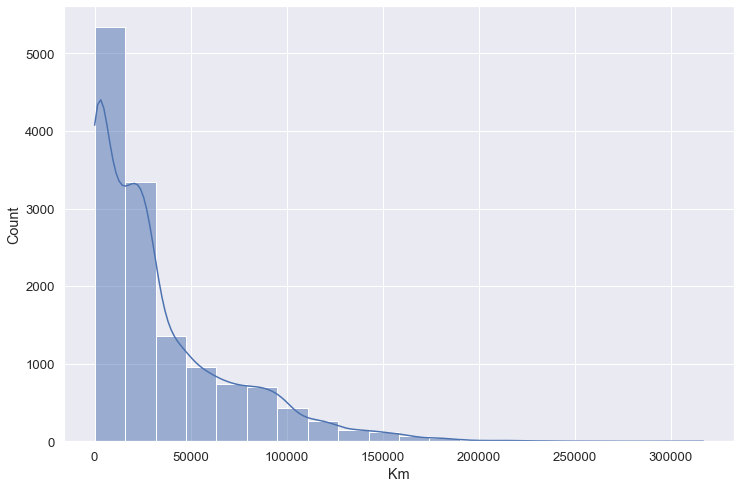

In [24]:
sns.histplot(df["Km"], bins=20, kde=True)

In [25]:
df.groupby(["Age"])["Km"].mean()

Age
0.0     2312.381886
1.0    18059.353189
2.0    42314.117161
3.0    76588.560241
Name: Km, dtype: float64

In [26]:
df.groupby(["Age","Type"])["Km"].mean()

Age  Type          
0.0  Demonstration      3385.441227
     Employee's car     4969.121495
     New                  53.530864
     Pre-registered      121.349153
     Used               3953.514946
1.0  Demonstration      8431.094488
     Employee's car    19088.158960
     New                  53.500000
     Pre-registered      502.468468
     Used              18808.357143
2.0  Demonstration     25327.296296
     Employee's car    37248.409639
     Pre-registered     2085.625000
     Used              42745.484195
3.0  Demonstration     45500.000000
     Employee's car    62493.466667
     Pre-registered       10.000000
     Used              76682.966071
Name: Km, dtype: float64

In [27]:
fillna_with3column(df,"Model","Age","Type","Km","mean")

Number of NaN Before mean Function:  899
NaN       899
10.0      827
1.0       306
5.0       138
50.0      127
         ... 
3105.0      1
2890.0      1
3806.0      1
6300.0      1
57.0        1
Name: Km, Length: 6690, dtype: int64
------------------
Number of NaN After mean Function:  726
10.0      831
NaN       726
1.0       306
5.0       138
50.0      127
         ... 
1794.0      1
5586.0      1
199.0       1
3521.0      1
57.0        1
Name: Km, Length: 6722, dtype: int64
------------------


In [28]:
fillna_with2column(df,"Model","Type","Km","mean")

Number of NaN Before mean Function:  726
10.0      831
NaN       726
1.0       306
5.0       138
50.0      127
         ... 
1794.0      1
5586.0      1
199.0       1
3521.0      1
57.0        1
Name: Km, Length: 6722, dtype: int64
------------------
Number of NaN After mean Function:  19
10.000000      831
1.000000       306
15.888889      188
11.465986      180
5.000000       138
              ... 
42.000000        1
1794.000000      1
5586.000000      1
199.000000       1
57.000000        1
Name: Km, Length: 6732, dtype: int64
------------------


In [29]:
fillna_with1column(df,"Model","Km","mean")

Number of NaN Before ModeFunction:  19
10.000000      831
1.000000       306
15.888889      188
11.465986      180
5.000000       138
              ... 
42.000000        1
1794.000000      1
5586.000000      1
199.000000       1
57.000000        1
Name: Km, Length: 6732, dtype: int64
------------------
Number of NaN After Mode Function:  0
10.000000      831
1.000000       306
15.888889      188
11.465986      180
5.000000       138
              ... 
1794.000000      1
5586.000000      1
199.000000       1
3521.000000      1
57.000000        1
Name: Km, Length: 6732, dtype: int64
------------------


#### Registration_Date & Age

In [30]:
numeric_look("Age")

----DESCRIBE : --------
count    13056.000000
mean         1.536765
std          1.070347
min          0.000000
25%          1.000000
50%          1.000000
75%          3.000000
max          3.000000
Name: Age, dtype: float64
----TOTAL NULL : --------
1377
----PERCENTAGE OF NULL : --------
% 9.54
----CORELATION : --------
Price                   0.453293
Km                      0.728965
Prev_Owner              0.217153
Door_Total              0.082749
Seat_Total              0.089357
Cylinders               0.150459
Weight                  0.075889
Emission_Label          0.101780
Gears                   0.089741
Consumption_Comb        0.224103
Consumption_City        0.271519
Consumption_Country     0.294398
Hp                      0.066671
Particulate_Filter      0.183119
Inspection_Situation    0.017939
Warranty                0.304312
Emission                0.248763
Engine_Size             0.173863
Age                     1.000000
Name: Age, dtype: float64
----VALUE COUNTS : ----

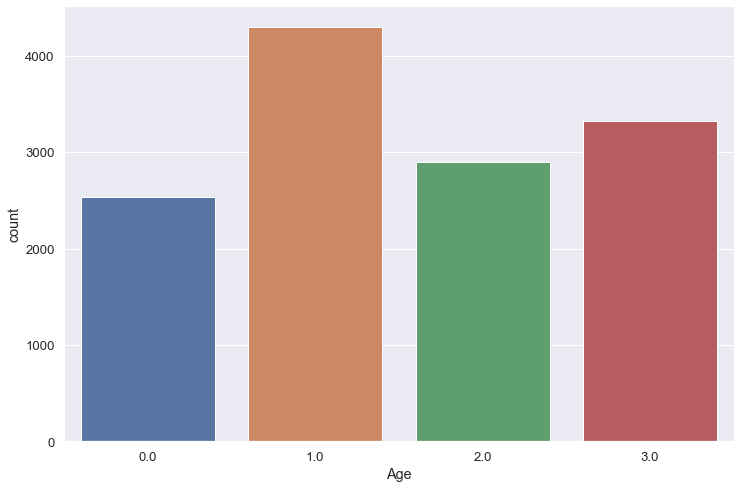

In [31]:
sns.countplot(x="Age", data=df);

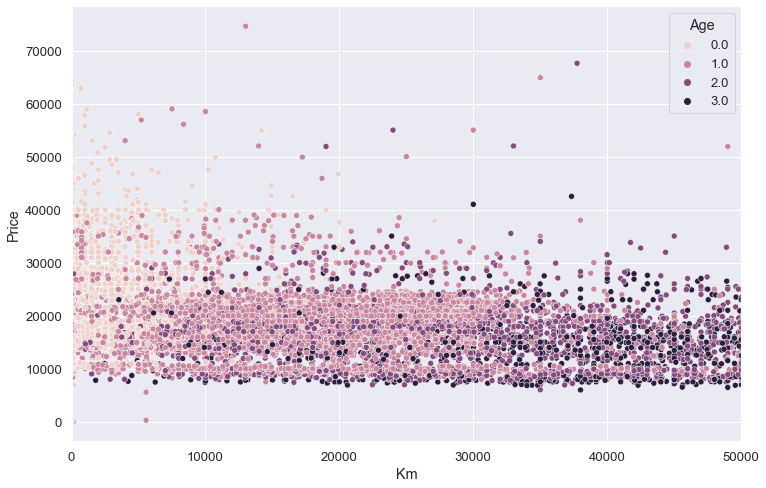

In [32]:
sns.scatterplot(x="Km",y="Price", hue="Age", data=df)
plt.xlim(0,50000);

In [33]:
#Getting km intervals for handling with missing values
df["Km_Interval"] =pd.cut(df["Km"], bins=[-1,5000,15000,30000,60000,100000,350000])
df["Km_Interval"].value_counts()

(-1, 5000]          4111
(15000, 30000]      3330
(30000, 60000]      2330
(5000, 15000]       1971
(60000, 100000]     1818
(100000, 350000]     873
Name: Km_Interval, dtype: int64

In [34]:
fillna_with2column(df,"Km_Interval","Type","Age","mode")

Number of NaN Before mode Function:  1377
1.0    4298
3.0    3320
2.0    2903
0.0    2535
NaN    1377
Name: Age, dtype: int64
------------------
Number of NaN After mode Function:  0
1.0    4306
0.0    3894
3.0    3325
2.0    2908
Name: Age, dtype: int64
------------------


In [35]:
df_regist = 2019 - df["Age"]
df_regist = pd.to_datetime(df_regist, format="%Y")
df["Registration_Date"].fillna(df_regist, inplace=True)
df["Registration_Date"].isnull().sum()

0

#### Prev_Owner

In [36]:
numeric_look("Prev_Owner")

----DESCRIBE : --------
count    8576.000000
mean        1.058186
std         0.320707
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         4.000000
Name: Prev_Owner, dtype: float64
----TOTAL NULL : --------
5857
----PERCENTAGE OF NULL : --------
% 40.58
----CORELATION : --------
Price                   0.126587
Km                      0.100321
Prev_Owner              1.000000
Door_Total              0.141950
Seat_Total              0.019246
Cylinders               0.058725
Weight                  0.055103
Emission_Label          0.004795
Gears                   0.025948
Consumption_Comb        0.049316
Consumption_City        0.046810
Consumption_Country     0.075869
Hp                      0.012555
Particulate_Filter      0.003630
Inspection_Situation    0.060878
Warranty                0.058192
Emission                0.011646
Engine_Size             0.018833
Age                     0.279425
Name: Prev_Owner, dtype: float64
----VALUE COUNTS

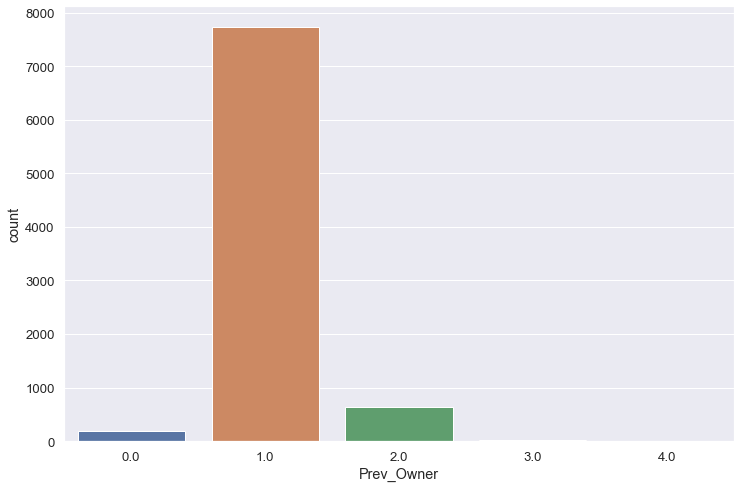

In [37]:
sns.countplot(x="Prev_Owner", data=df);

In [38]:
df[(df["Prev_Owner"].isnull()) & (df["Type"]=="New") | (df["Type"]=="Pre-registered")].sample(5)

,Model,Body_Type,Price,Vat,Km,Registration_Date,Prev_Owner,Type,Body_Color,Paint_Type,Door_Total,Seat_Total,Gear_Type,Cylinders,Weight,Drive_Chain,Fuel,Emission_Class,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,Emission_Label,Gears,Country,Consumption_Comb,Consumption_City,Consumption_Country,Hp,Particulate_Filter,Inspection_Time,Inspection_Situation,Warranty,Emission,Upholstery_Type,Upholstery_Color,Engine_Size,Age,Price_Interval,Km_Interval
12672,Opel Insignia,Station wagon,29990.0,VAT deductible,7.0,2019-01-01,NaN,New,Grey,Uni/basic,5.0,5.0,Automatic,4.0,1522.0,NaN,Benzine,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Digital radio,Hands-free equipment,M...","Alloy wheels,Roof rack,Ski bag,Sport package,S...","Adaptive headlights,Alarm system,Blind spot mo...",4.0,6.0,Germany,6.5,8.0,5.7,121.0,0,NaT,0,NaN,149.0,Cloth,Other,1490.0,0.0,"(25000, 30000]","(-1, 5000]"
960,Audi A1,Compact,20980.0,VAT deductible,1.0,2019-01-01,NaN,New,NaN,NaN,5.0,5.0,Automatic,4.0,1240.0,front,Benzine,Euro 6d,"Air conditioning,Electrical side mirrors,Hill ...","Bluetooth,Hands-free equipment,On-board comput...",NaN,"ABS,Daytime running lights,Driver-side airbag,...",4.0,7.0,European Union,5.1,6.5,4.3,110.0,1,NaT,0,NaN,116.0,Velour,NaN,1498.0,0.0,"(20000, 25000]","(-1, 5000]"
15735,Renault Espace,Van,35425.0,VAT deductible,11.0,2019-01-01,NaN,New,Black,Metallic,5.0,5.0,Automatic,4.0,NaN,front,Diesel,Euro 6d,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Digital radio,Hands-free equipment,M...","Alloy wheels,Touch screen","ABS,Adaptive Cruise Control,Blind spot monitor...",4.0,6.0,Germany,5.1,5.7,4.8,118.0,1,NaT,1,24.0,135.0,Cloth,Other,1997.0,0.0,"(30000, 80000]","(-1, 5000]"
15436,Renault Espace,Van,31975.0,VAT deductible,15.0,2019-03-01,1.0,Pre-registered,White,NaN,5.0,5.0,Automatic,4.0,NaN,front,Diesel,Euro 6d,"Air conditioning,Automatic climate control,Cru...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Trailer hitch","ABS,Blind spot monitor,Central door lock,Dayti...",4.0,6.0,Austria,5.1,5.7,4.8,118.0,0,NaT,1,NaN,135.0,Part leather,Black,1997.0,0.0,"(30000, 80000]","(-1, 5000]"
11392,Opel Insignia,Station wagon,21410.0,VAT deductible,1.0,2017-07-01,1.0,Pre-registered,Blue,Metallic,5.0,5.0,Automatic,NaN,1580.0,NaN,Benzine,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,MP3,On-board co...","Alloy wheels,Roof rack","ABS,Adaptive headlights,Central door lock,Dayt...",4.0,6.0,Poland,6.2,7.7,5.3,121.0,0,2020-07-01,0,12.0,141.0,Part leather,Black,1498.0,2.0,"(20000, 25000]","(-1, 5000]"


In [39]:
df.loc[(df["Prev_Owner"].isnull()) & (df["Type"]=="New") | (df["Type"]=="Pre-registered") , "Prev_Owner"] = 0

In [40]:
df.groupby("Prev_Owner")["Km"].mean()

Prev_Owner
0.0      547.336771
1.0    39270.644604
2.0    43371.130094
3.0    48588.470588
4.0    38350.000000
Name: Km, dtype: float64

In [41]:
df.loc[df[(df["Prev_Owner"].isnull()) & (df["Km"]<500)].index, "Prev_Owner"] = 0

In [42]:
df.groupby(["Age","Type"])["Prev_Owner"].value_counts(normalize=True)

Age  Type            Prev_Owner
0.0  Demonstration   1.0           0.838710
                     0.0           0.159140
                     2.0           0.002151
     Employee's car  1.0           0.774194
                     0.0           0.215054
                     2.0           0.010753
     New             0.0           0.990162
                     1.0           0.009838
     Pre-registered  0.0           1.000000
     Used            1.0           0.600000
                     0.0           0.394690
                     2.0           0.005310
1.0  Demonstration   1.0           0.859813
                     0.0           0.121495
                     2.0           0.018692
     Employee's car  1.0           0.959615
                     0.0           0.025000
                     2.0           0.015385
     New             0.0           0.666667
                     1.0           0.333333
     Pre-registered  0.0           1.000000
     Used            1.0           0.951906


In [43]:
fillna_with2column(df,"Age","Type","Prev_Owner","mode")

Number of NaN Before mode Function:  3787
1.0    7043
NaN    3787
0.0    2946
2.0     638
3.0      17
4.0       2
Name: Prev_Owner, dtype: int64
------------------
Number of NaN After mode Function:  0
1.0    10830
0.0     2946
2.0      638
3.0       17
4.0        2
Name: Prev_Owner, dtype: int64
------------------


#### Door_Total

In [44]:
numeric_look("Door_Total")

----DESCRIBE : --------
count    14292.000000
mean         4.655682
std          0.643762
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          7.000000
Name: Door_Total, dtype: float64
----TOTAL NULL : --------
141
----PERCENTAGE OF NULL : --------
% 0.98
----CORELATION : --------
Price                   0.158224
Km                      0.010805
Prev_Owner              0.109105
Door_Total              1.000000
Seat_Total              0.113372
Cylinders               0.074362
Weight                  0.166056
Emission_Label          0.095722
Gears                   0.095083
Consumption_Comb        0.021066
Consumption_City        0.050252
Consumption_Country     0.015584
Hp                      0.122280
Particulate_Filter      0.030392
Inspection_Situation    0.117980
Warranty                0.025780
Emission                0.036187
Engine_Size             0.066608
Age                     0.093838
Name: Door_Total, dtype: float64
----VALUE 

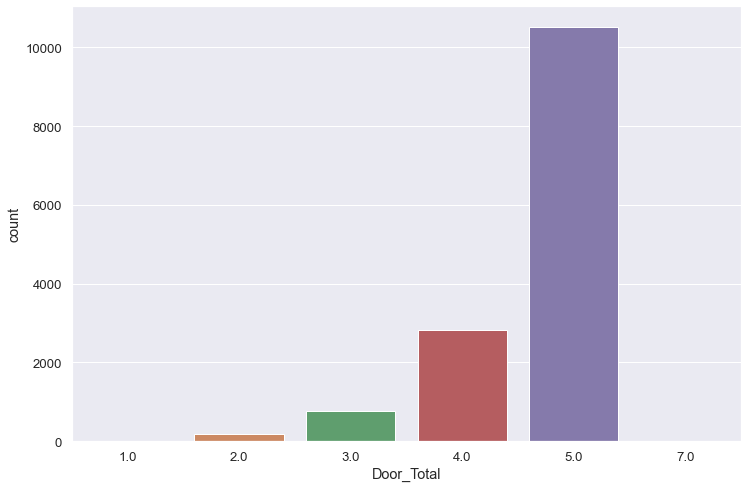

In [45]:
sns.countplot(x="Door_Total", data=df);

In [46]:
df.groupby("Model")["Door_Total"].value_counts(normalize=True)

Model           Door_Total
Audi A1         5.0           0.679444
                4.0           0.200927
                3.0           0.088458
                2.0           0.031171
Audi A2         5.0           1.000000
Audi A3         5.0           0.728117
                4.0           0.225080
                3.0           0.037156
                2.0           0.009646
Opel Astra      5.0           0.791775
                4.0           0.206494
                3.0           0.001732
Opel Corsa      5.0           0.595262
                3.0           0.216683
                4.0           0.142152
                2.0           0.045903
Opel Insignia   5.0           0.705637
                4.0           0.294363
Renault Clio    5.0           0.885734
                4.0           0.113590
                1.0           0.000676
Renault Duster  5.0           1.000000
Renault Espace  5.0           0.909611
                4.0           0.089245
                7.0           0.00114

In [47]:
fillna_with2column(df,"Model","Seat_Total","Door_Total","mode")

Number of NaN Before mode Function:  141
5.0    10516
4.0     2823
3.0      757
2.0      194
NaN      141
1.0        1
7.0        1
Name: Door_Total, dtype: int64
------------------
Number of NaN After mode Function:  0
5.0    10657
4.0     2823
3.0      757
2.0      194
1.0        1
7.0        1
Name: Door_Total, dtype: int64
------------------


#### Seat_Total

In [48]:
numeric_look("Seat_Total")

----DESCRIBE : --------
count    13570.000000
mean         4.947605
std          0.475019
min          2.000000
25%          5.000000
50%          5.000000
75%          5.000000
max          7.000000
Name: Seat_Total, dtype: float64
----TOTAL NULL : --------
863
----PERCENTAGE OF NULL : --------
% 5.98
----CORELATION : --------
Price                   0.247672
Km                      0.011535
Prev_Owner              0.053606
Door_Total              0.113431
Seat_Total              1.000000
Cylinders               0.250920
Weight                  0.309875
Emission_Label          0.013023
Gears                   0.089607
Consumption_Comb        0.128277
Consumption_City        0.126942
Consumption_Country     0.141864
Hp                      0.291104
Particulate_Filter      0.044303
Inspection_Situation    0.005726
Warranty                0.068714
Emission                0.247853
Engine_Size             0.174447
Age                     0.087826
Name: Seat_Total, dtype: float64
----VALUE 

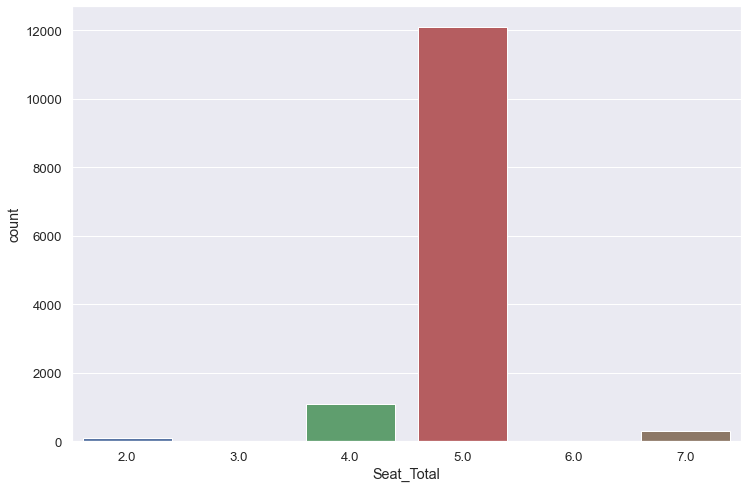

In [49]:
sns.countplot(x="Seat_Total", data=df);

In [50]:
df.groupby(["Model"])["Seat_Total"].value_counts(normalize=True)

Model           Seat_Total
Audi A1         5.0           0.543968
                4.0           0.455148
                3.0           0.000442
                6.0           0.000442
Audi A2         5.0           1.000000
Audi A3         5.0           0.990758
                4.0           0.009242
Opel Astra      5.0           0.997710
                4.0           0.002290
Opel Corsa      5.0           0.993884
                4.0           0.003568
                2.0           0.002548
Opel Insignia   5.0           0.998706
                4.0           0.000863
                2.0           0.000431
Renault Clio    5.0           0.936138
                2.0           0.060105
                4.0           0.003757
Renault Duster  5.0           1.000000
Renault Espace  5.0           0.595084
                7.0           0.402329
                4.0           0.001294
                6.0           0.001294
Name: Seat_Total, dtype: float64

In [51]:
fillna_with2column(df,"Model","Body_Type","Seat_Total","mode")

Number of NaN Before mode Function:  863
5.0    12095
4.0     1075
NaN      863
7.0      311
2.0       86
6.0        2
3.0        1
Name: Seat_Total, dtype: int64
------------------
Number of NaN After mode Function:  0
5.0    12956
4.0     1076
7.0      311
2.0       87
6.0        2
3.0        1
Name: Seat_Total, dtype: int64
------------------


#### Engine_Size

In [52]:
numeric_look("Engine_Size")

----DESCRIBE : --------
count    14279.000000
mean      1427.280832
std        338.691049
min          1.000000
25%       1229.000000
50%       1461.000000
75%       1598.000000
max      16000.000000
Name: Engine_Size, dtype: float64
----TOTAL NULL : --------
154
----PERCENTAGE OF NULL : --------
% 1.07
----CORELATION : --------
Price                   0.219808
Km                      0.269148
Prev_Owner              0.116530
Door_Total              0.065738
Seat_Total              0.165909
Cylinders               0.618450
Weight                  0.563242
Emission_Label          0.014501
Gears                   0.274915
Consumption_Comb        0.012199
Consumption_City        0.007211
Consumption_Country     0.016349
Hp                      0.499567
Particulate_Filter      0.359742
Inspection_Situation    0.009198
Warranty                0.103312
Emission                0.261193
Engine_Size             1.000000
Age                     0.187546
Name: Engine_Size, dtype: float64
----VALU

<AxesSubplot:xlabel='Engine_Size'>

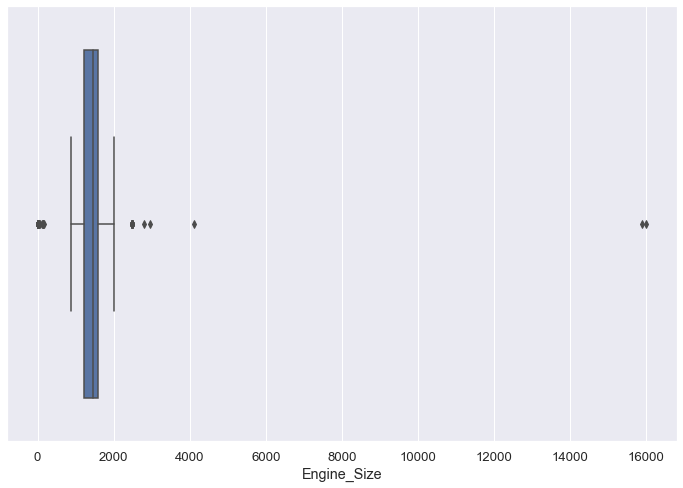

In [53]:
sns.boxplot(df["Engine_Size"])

In [54]:
#Getting outliers to normal position to handle with NaN values
df.loc[df[df["Engine_Size"]>10000].index,"Engine_Size"] = 1600

In [55]:
df[df["Engine_Size"]<500]

,Model,Body_Type,Price,Vat,Km,Registration_Date,Prev_Owner,Type,Body_Color,Paint_Type,Door_Total,Seat_Total,Gear_Type,Cylinders,Weight,Drive_Chain,Fuel,Emission_Class,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,Emission_Label,Gears,Country,Consumption_Comb,Consumption_City,Consumption_Country,Hp,Particulate_Filter,Inspection_Time,Inspection_Situation,Warranty,Emission,Upholstery_Type,Upholstery_Color,Engine_Size,Age,Price_Interval,Km_Interval
7809,Opel Astra,Sedans,23940.0,VAT deductible,12.000000,2019-03-01,0.0,Pre-registered,Black,Metallic,5.0,5.0,Automatic,NaN,1352.0,front,Benzine,Euro 6d,"Air conditioning,Armrest,Automatic climate con...","MP3,On-board computer,Radio,USB","Alloy wheels,Catalytic Converter","ABS,Central door lock,Daytime running lights,D...",4.0,6.0,Germany,6.1,7.5,5.2,110.0,0,NaT,1,NaN,139.0,Cloth,Black,139.0,0.0,"(20000, 25000]","(-1, 5000]"
7810,Opel Astra,Sedans,23940.0,VAT deductible,12.000000,2019-03-01,0.0,Pre-registered,Silver,Metallic,5.0,5.0,Automatic,NaN,1352.0,front,Benzine,Euro 6d,"Air conditioning,Armrest,Automatic climate con...","MP3,On-board computer,Radio,USB","Alloy wheels,Catalytic Converter","ABS,Central door lock,Daytime running lights,D...",4.0,6.0,Germany,6.1,7.5,5.2,110.0,0,NaT,1,NaN,139.0,Cloth,Black,139.0,0.0,"(20000, 25000]","(-1, 5000]"
7811,Opel Astra,Sedans,23940.0,VAT deductible,12.000000,2019-03-01,0.0,Pre-registered,Grey,Metallic,5.0,5.0,Automatic,NaN,1352.0,front,Benzine,Euro 6d,"Air conditioning,Armrest,Automatic climate con...","MP3,On-board computer,Radio,USB","Alloy wheels,Catalytic Converter","ABS,Central door lock,Daytime running lights,D...",4.0,6.0,Germany,6.1,7.5,5.2,110.0,0,NaT,1,NaN,139.0,Cloth,Black,139.0,0.0,"(20000, 25000]","(-1, 5000]"
7812,Opel Astra,Sedans,23940.0,VAT deductible,12.000000,2019-04-01,0.0,Pre-registered,Blue,Metallic,5.0,5.0,Automatic,NaN,1352.0,front,Benzine,Euro 6d,"Air conditioning,Armrest,Automatic climate con...","On-board computer,Radio,USB","Alloy wheels,Catalytic Converter","ABS,Central door lock,Daytime running lights,D...",4.0,NaN,Germany,6.1,7.5,5.2,110.0,0,NaT,1,NaN,139.0,Cloth,Black,139.0,0.0,"(20000, 25000]","(-1, 5000]"
8128,Opel Astra,Station wagon,18830.0,VAT deductible,10.000000,2019-04-01,0.0,Demonstration,White,NaN,5.0,5.0,Manual,NaN,NaN,front,Benzine,NaN,"Air conditioning,Automatic climate control,Cru...","Bluetooth,CD player,MP3,On-board computer,Radio","Alloy wheels,Roof rack,Sport seats","ABS,Central door lock,Driver-side airbag,Elect...",NaN,6.0,NaN,NaN,NaN,NaN,92.0,0,NaT,0,NaN,NaN,Cloth,Black,140.0,0.0,"(15000, 20000]","(-1, 5000]"
10194,Opel Corsa,Compact,10940.0,VAT deductible,12.000000,2019-04-01,0.0,Pre-registered,White,NaN,3.0,5.0,Manual,NaN,1162.0,front,Benzine,Euro 6d,"Air conditioning,Electrical side mirrors,Hill ...","On-board computer,Radio",Catalytic Converter,"ABS,Central door lock,Daytime running lights,D...",4.0,NaN,Germany,5.9,7.4,5.0,51.0,0,NaT,1,NaN,134.0,Cloth,Black,122.0,0.0,"(10000, 15000]","(-1, 5000]"
10559,Opel Insignia,Station wagon,16950.0,VAT deductible,84700.000000,2016-06-01,1.0,Used,Silver,Metallic,5.0,5.0,Automatic,NaN,NaN,NaN,Diesel,NaN,"Air conditioning,Automatic climate control,Cru...",Sound system,NaN,"Blind spot monitor,Tire pressure monitoring sy...",4.0,NaN,NaN,NaN,NaN,NaN,125.0,1,NaT,1,NaN,NaN,Full leather,Black,2.0,3.0,"(15000, 20000]","(60000, 100000]"
12467,Opel Insignia,Station wagon,37490.0,VAT deductible,4056.359477,2019-06-01,1.0,Demonstration,Grey,NaN,5.0,5.0,Automatic,NaN,NaN,front,Diesel,Euro 6,"Air conditioning,Automatic climate control,Cru...","Bluetooth,CD player,MP3,Radio","Alloy wheels,Roof rack","ABS,Central door lock,Driver-side airbag,Elect...",NaN,6.0,NaN,NaN,NaN,NaN,100.0,1,NaT,0,NaN,NaN,Part leather,NaN,1.0,0.0,"(30000, 80000]","(-1, 5000]"
12473,Opel Insignia,Station wagon,34490.0,VAT deductible,4056.359477,2019-05-01,1.0,Demonstration,Silver,NaN,5.0,5.0,Automatic,NaN,NaN,front,Diesel,Euro 6,"Air conditioning,Automatic climate control,Cru

In [56]:
df.loc[df[(df["Engine_Size"]>100)&(df["Engine_Size"]<200)].index,"Engine_Size"] = df[(df["Engine_Size"]>100)&(df["Engine_Size"]<200)]["Engine_Size"]*10
df.loc[df[df["Engine_Size"]==54].index,"Engine_Size"] = np.nan
df.loc[df[df["Engine_Size"]<10].index,"Engine_Size"] = df[df["Engine_Size"]<10]["Engine_Size"]*1000

In [57]:
df["Engine_Size"] = round(df["Engine_Size"]/1000,1)

In [58]:
df["Engine_Size"].value_counts(dropna=False)

1.6    4756
1.4    2869
1.0    2434
1.5    1248
2.0    1131
1.2    1043
0.9     306
1.1     258
1.8     194
NaN     155
2.5      20
1.3      12
1.9       2
1.7       2
2.8       1
3.0       1
4.1       1
Name: Engine_Size, dtype: int64

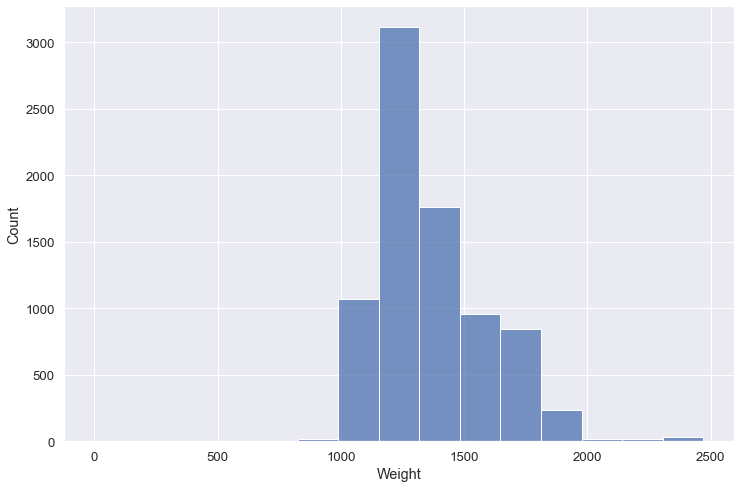

In [59]:
sns.histplot(df["Weight"], bins=15);

In [60]:
#Getting Weight interval for looking relationship. (Because it is highly correlated)
df["Weight_Interval"] = pd.cut(df["Weight"],[0,1000,1200,1400,1600,1800,3000])
df["Weight_Interval"].value_counts()

(1200, 1400]    2894
(1000, 1200]    2611
(1400, 1600]    1142
(1600, 1800]    1100
(1800, 3000]     303
(0, 1000]         18
Name: Weight_Interval, dtype: int64

<AxesSubplot:xlabel='Hp', ylabel='Count'>

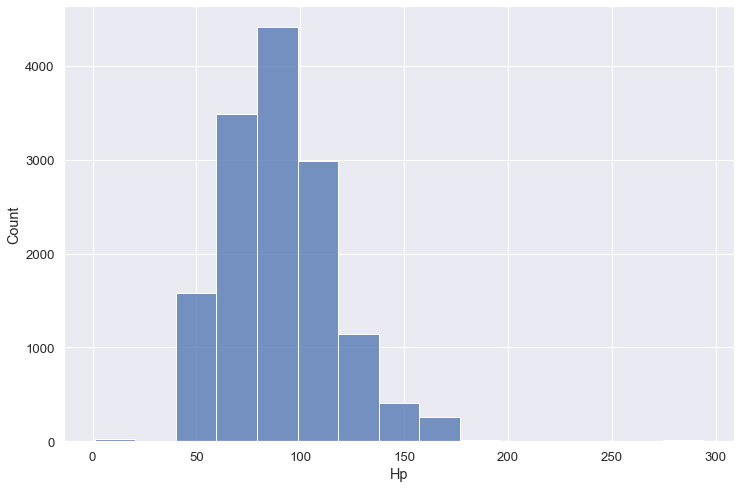

In [61]:
sns.histplot(df["Hp"], bins=15)

In [62]:
#Getting Hp interval for looking relationship. (Because it is highly correlated)
df["Hp_Interval"] = pd.cut(df["Hp"],[0,50,60,70,80,90,100,120,350])
df["Hp_Interval"].value_counts()

(80, 90]      3937
(60, 70]      2861
(120, 350]    1822
(100, 120]    1795
(50, 60]      1739
(90, 100]     1700
(70, 80]       471
(0, 50]         25
Name: Hp_Interval, dtype: int64

In [63]:
fillna_with3column(df,"Cylinders","Weight_Interval","Hp_Interval","Engine_Size","mode")

Number of NaN Before mode Function:  155
1.6    4756
1.4    2869
1.0    2434
1.5    1248
2.0    1131
1.2    1043
0.9     306
1.1     258
1.8     194
NaN     155
2.5      20
1.3      12
1.9       2
1.7       2
2.8       1
3.0       1
4.1       1
Name: Engine_Size, dtype: int64
------------------
Number of NaN After mode Function:  139
1.6    4767
1.4    2870
1.0    2436
1.5    1248
2.0    1132
1.2    1043
0.9     306
1.1     258
1.8     194
NaN     139
2.5      21
1.3      12
1.9       2
1.7       2
2.8       1
3.0       1
4.1       1
Name: Engine_Size, dtype: int64
------------------


In [64]:
fillna_with3column(df,"Model","Hp_Interval","Weight_Interval","Engine_Size","mode")

Number of NaN Before mode Function:  139
1.6    4767
1.4    2870
1.0    2436
1.5    1248
2.0    1132
1.2    1043
0.9     306
1.1     258
1.8     194
NaN     139
2.5      21
1.3      12
1.9       2
1.7       2
2.8       1
3.0       1
4.1       1
Name: Engine_Size, dtype: int64
------------------
Number of NaN After mode Function:  0
1.6    4843
1.4    2884
1.0    2446
1.5    1286
2.0    1132
1.2    1044
0.9     306
1.1     258
1.8     194
2.5      21
1.3      12
1.9       2
1.7       2
2.8       1
3.0       1
4.1       1
Name: Engine_Size, dtype: int64
------------------


#### Cylinders

In [65]:
numeric_look("Cylinders")

----DESCRIBE : --------
count    9404.000000
mean        3.794236
std         0.418752
min         1.000000
25%         4.000000
50%         4.000000
75%         4.000000
max         8.000000
Name: Cylinders, dtype: float64
----TOTAL NULL : --------
5029
----PERCENTAGE OF NULL : --------
% 34.84
----CORELATION : --------
Price                   0.008582
Km                      0.211893
Prev_Owner              0.109396
Door_Total              0.074158
Seat_Total              0.240205
Cylinders               1.000000
Weight                  0.269336
Emission_Label          0.039168
Gears                   0.134874
Consumption_Comb        0.077573
Consumption_City        0.098501
Consumption_Country     0.074251
Hp                      0.310986
Particulate_Filter      0.160111
Inspection_Situation    0.033631
Warranty                0.199095
Emission                0.332920
Engine_Size             0.696087
Age                     0.165262
Name: Cylinders, dtype: float64
----VALUE COUNTS :

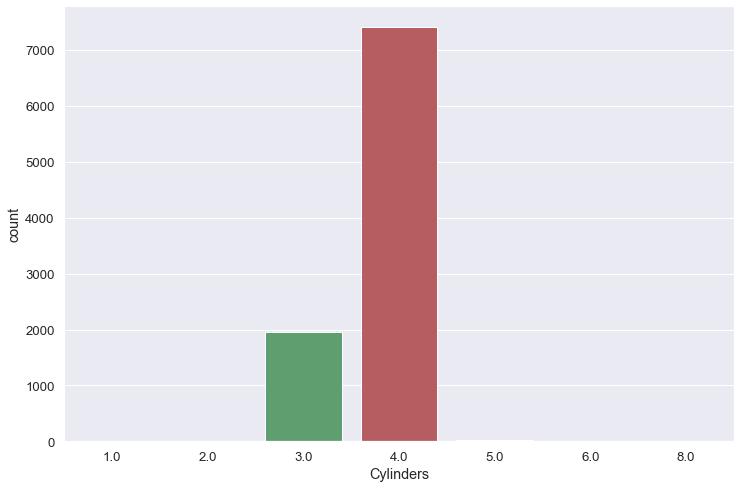

In [66]:
sns.countplot(x="Cylinders", data=df);

In [67]:
df.groupby("Model")["Cylinders"].value_counts()

Model           Cylinders
Audi A1         3.0          1271
                4.0           380
                8.0             1
Audi A3         4.0          1719
                3.0           349
                5.0            21
Opel Astra      4.0          1158
                3.0           170
Opel Corsa      4.0          1298
                3.0             9
                1.0             1
Opel Insignia   4.0          1467
                6.0             3
                2.0             1
Renault Clio    4.0           775
                3.0           165
                5.0             1
Renault Duster  4.0            33
Renault Espace  4.0           580
                2.0             1
                8.0             1
Name: Cylinders, dtype: int64

In [68]:
fillna_with3column(df,"Model","Engine_Size","Hp_Interval","Cylinders","mode")

Number of NaN Before mode Function:  5029
4.0    7410
NaN    5029
3.0    1964
5.0      22
6.0       3
8.0       2
2.0       2
1.0       1
Name: Cylinders, dtype: int64
------------------
Number of NaN After mode Function:  0
4.0    11583
3.0     2820
5.0       22
6.0        3
8.0        2
2.0        2
1.0        1
Name: Cylinders, dtype: int64
------------------


#### Weight

In [69]:
numeric_look("Weight")

----DESCRIBE : --------
count    8068.000000
mean     1354.579202
std       224.256342
min         1.000000
25%      1170.000000
50%      1293.000000
75%      1487.000000
max      2471.000000
Name: Weight, dtype: float64
----TOTAL NULL : --------
6365
----PERCENTAGE OF NULL : --------
% 44.1
----CORELATION : --------
Price                   0.413675
Km                      0.163785
Prev_Owner              0.070493
Door_Total              0.165643
Seat_Total              0.306003
Cylinders               0.284905
Weight                  1.000000
Emission_Label          0.021322
Gears                   0.305033
Consumption_Comb        0.027281
Consumption_City        0.001840
Consumption_Country     0.035053
Hp                      0.582621
Particulate_Filter      0.225370
Inspection_Situation    0.014202
Warranty                0.022966
Emission                0.267368
Engine_Size             0.567942
Age                     0.084180
Name: Weight, dtype: float64
----VALUE COUNTS : ------

<AxesSubplot:xlabel='Weight', ylabel='Count'>

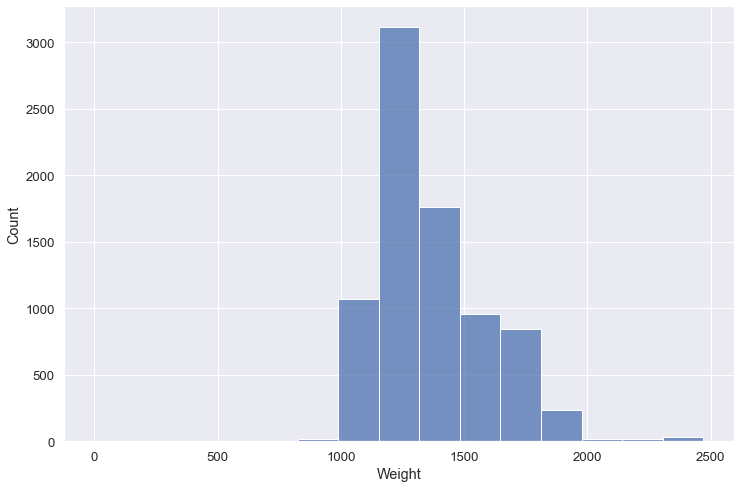

In [70]:
sns.histplot(df["Weight"], bins=15)

In [71]:
fillna_with3column(df,"Model","Hp_Interval","Engine_Size","Weight","mean")

Number of NaN Before mean Function:  6365
NaN       6365
1163.0     517
1360.0     320
1165.0     243
1335.0     221
          ... 
1213.0       1
1960.0       1
1258.0       1
1167.0       1
2037.0       1
Name: Weight, Length: 435, dtype: int64
------------------
Number of NaN After mean Function:  199
1177.930533    566
1403.990800    565
1163.000000    517
1697.718121    399
1183.580952    332
              ... 
1905.000000      1
1565.000000      1
1650.000000      1
1705.000000      1
2037.000000      1
Name: Weight, Length: 497, dtype: int64
------------------


In [72]:
fillna_with2column(df,"Model","Engine_Size","Weight","mean")

Number of NaN Before mean Function:  199
1177.930533    566
1403.990800    565
1163.000000    517
1697.718121    399
1183.580952    332
              ... 
1905.000000      1
1565.000000      1
1650.000000      1
1705.000000      1
2037.000000      1
Name: Weight, Length: 497, dtype: int64
------------------
Number of NaN After mean Function:  80
1177.930533    566
1403.990800    565
1163.000000    517
1697.718121    399
1183.580952    332
              ... 
1394.000000      1
1591.000000      1
1382.000000      1
1507.000000      1
2037.000000      1
Name: Weight, Length: 512, dtype: int64
------------------


In [73]:
fillna_with1column(df,"Engine_Size","Weight","mean")

Number of NaN Before ModeFunction:  80
1177.930533    566
1403.990800    565
1163.000000    517
1697.718121    399
1183.580952    332
              ... 
1394.000000      1
1591.000000      1
1382.000000      1
1507.000000      1
2037.000000      1
Name: Weight, Length: 512, dtype: int64
------------------
Number of NaN After Mode Function:  2
1177.930533    566
1403.990800    565
1163.000000    517
1697.718121    399
1183.580952    332
              ... 
1277.000000      1
1281.000000      1
1645.000000      1
1181.000000      1
2037.000000      1
Name: Weight, Length: 517, dtype: int64
------------------


In [74]:
fillna_with1column(df,"Model","Weight","mean")

Number of NaN Before ModeFunction:  2
1177.930533    566
1403.990800    565
1163.000000    517
1697.718121    399
1183.580952    332
              ... 
1277.000000      1
1281.000000      1
1645.000000      1
1181.000000      1
2037.000000      1
Name: Weight, Length: 517, dtype: int64
------------------
Number of NaN After Mode Function:  0
1177.930533    566
1403.990800    565
1163.000000    517
1697.718121    399
1183.580952    332
              ... 
1394.000000      1
1591.000000      1
1382.000000      1
1507.000000      1
2037.000000      1
Name: Weight, Length: 518, dtype: int64
------------------


In [75]:
df["Weight_Interval"] = pd.cut(df["Weight"],[0,1000,1200,1400,1600,1800,3000])
df["Weight_Interval"].value_counts()

(1200, 1400]    4825
(1000, 1200]    4337
(1400, 1600]    3014
(1600, 1800]    1893
(1800, 3000]     332
(0, 1000]         32
Name: Weight_Interval, dtype: int64

#### Emission_Label

In [76]:
numeric_look("Emission_Label")

----DESCRIBE : --------
count    7310.000000
mean        3.846512
std         0.677996
min         1.000000
25%         4.000000
50%         4.000000
75%         4.000000
max         5.000000
Name: Emission_Label, dtype: float64
----TOTAL NULL : --------
7123
----PERCENTAGE OF NULL : --------
% 49.35
----CORELATION : --------
Price                   0.096448
Km                      0.062899
Prev_Owner              0.109440
Door_Total              0.096097
Seat_Total              0.012591
Cylinders               0.036553
Weight                  0.008776
Emission_Label          1.000000
Gears                   0.139666
Consumption_Comb        0.060375
Consumption_City        0.110966
Consumption_Country     0.029298
Hp                      0.048971
Particulate_Filter      0.034353
Inspection_Situation    0.166477
Warranty                0.077223
Emission                0.091552
Engine_Size             0.017428
Age                     0.081954
Name: Emission_Label, dtype: float64
----VALU

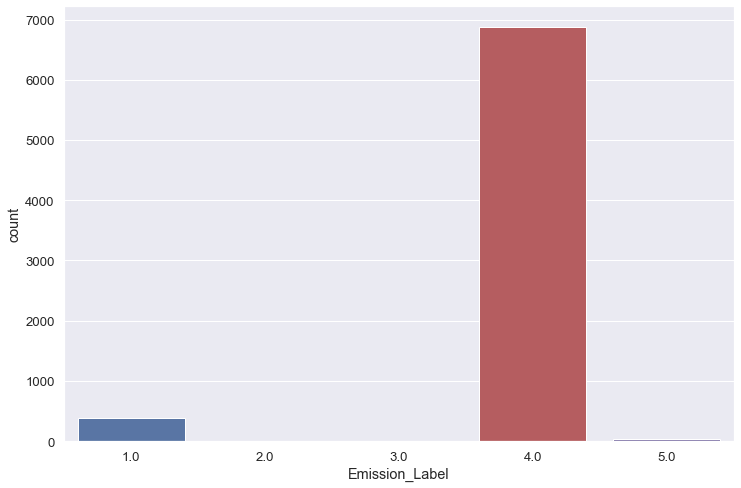

In [77]:
sns.countplot(x="Emission_Label", data=df);

In [78]:
df.groupby("Emission_Class")["Emission_Label"].value_counts()

Emission_Class  Emission_Label
Euro 4          4.0                  5
Euro 5          4.0                 19
                1.0                  2
Euro 6          4.0               4838
                1.0                201
                5.0                 38
Euro 6c         4.0                 72
                5.0                  3
Euro 6d         4.0               1380
                1.0                 63
                5.0                  2
                3.0                  1
Name: Emission_Label, dtype: int64

In [79]:
#There is only %9 corelation with Price Columns. So I dropped it
df.drop(columns="Emission_Label", inplace=True)

#### Gears

In [80]:
numeric_look("Gears")

----DESCRIBE : --------
count    10228.000000
mean         5.923739
std          0.856504
min          1.000000
25%          5.000000
50%          6.000000
75%          6.000000
max         50.000000
Name: Gears, dtype: float64
----TOTAL NULL : --------
4205
----PERCENTAGE OF NULL : --------
% 29.13
----CORELATION : --------
Price                   0.481410
Km                      0.045217
Prev_Owner              0.060802
Door_Total              0.094636
Seat_Total              0.086915
Cylinders               0.090876
Weight                  0.345579
Gears                   1.000000
Consumption_Comb        0.000805
Consumption_City        0.017116
Consumption_Country     0.020737
Hp                      0.421235
Particulate_Filter      0.185083
Inspection_Situation    0.013046
Warranty                0.016127
Emission                0.124622
Engine_Size             0.351808
Age                     0.089008
Name: Gears, dtype: float64
----VALUE COUNTS : --------
6.0     5312
NaN     42

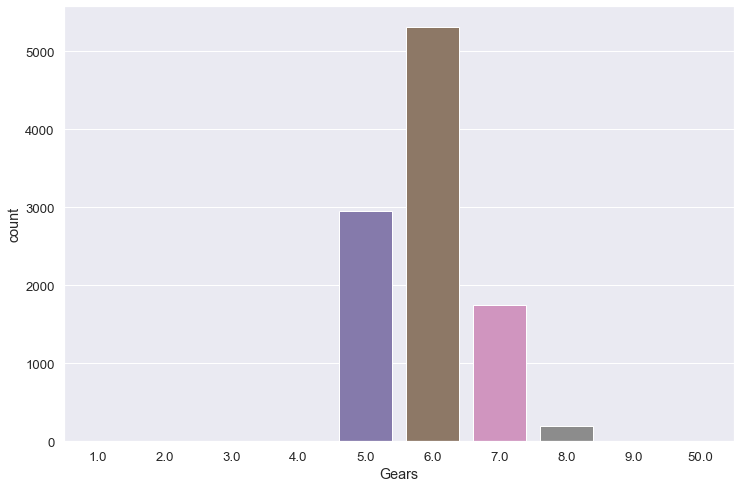

In [81]:
sns.countplot(x="Gears", data=df);

In [82]:
fillna_with3column(df,"Hp_Interval","Engine_Size","Weight_Interval", "Gears","mode")

Number of NaN Before mode Function:  4205
6.0     5312
NaN     4205
5.0     2959
7.0     1747
8.0      199
9.0        4
1.0        2
3.0        2
2.0        1
50.0       1
4.0        1
Name: Gears, dtype: int64
------------------
Number of NaN After mode Function:  61
6.0     7908
5.0     4388
7.0     1866
8.0      199
NaN       61
9.0        4
1.0        2
3.0        2
2.0        1
50.0       1
4.0        1
Name: Gears, dtype: int64
------------------


In [83]:
fillna_with2column(df,"Engine_Size","Weight_Interval","Gears","mode")

Number of NaN Before mode Function:  61
6.0     7908
5.0     4388
7.0     1866
8.0      199
NaN       61
9.0        4
1.0        2
3.0        2
2.0        1
50.0       1
4.0        1
Name: Gears, dtype: int64
------------------
Number of NaN After mode Function:  0
6.0     7963
5.0     4394
7.0     1866
8.0      199
9.0        4
1.0        2
3.0        2
2.0        1
50.0       1
4.0        1
Name: Gears, dtype: int64
------------------


#### Consumption 

In [84]:
numeric_look("Consumption_Comb")

----DESCRIBE : --------
count    12615.000000
mean         4.898367
std          1.690544
min          0.000000
25%          4.100000
50%          4.800000
75%          5.500000
max         55.000000
Name: Consumption_Comb, dtype: float64
----TOTAL NULL : --------
1818
----PERCENTAGE OF NULL : --------
% 12.6
----CORELATION : --------
Price                   0.157923
Km                      0.193254
Prev_Owner              0.124106
Door_Total              0.020550
Seat_Total              0.120271
Cylinders               0.099384
Weight                  0.047439
Gears                   0.012009
Consumption_Comb        1.000000
Consumption_City        0.873565
Consumption_Country     0.904813
Hp                      0.205839
Particulate_Filter      0.190706
Inspection_Situation    0.057788
Warranty                0.074583
Emission                0.521212
Engine_Size             0.014969
Age                     0.216666
Name: Consumption_Comb, dtype: float64
----VALUE COUNTS : --------
Na

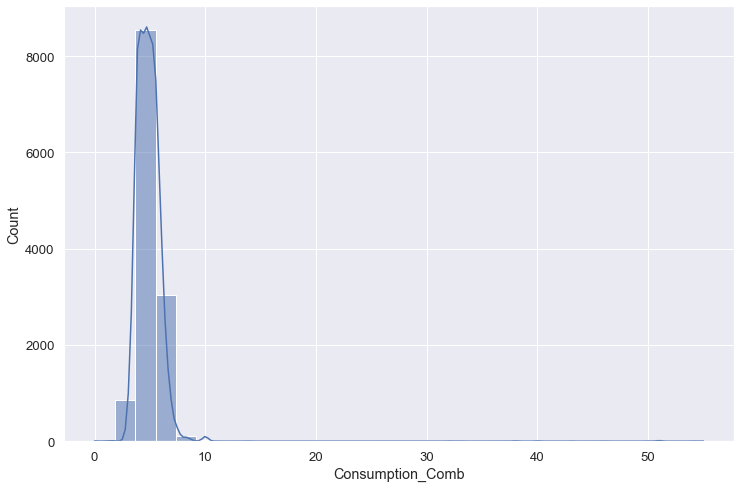

In [85]:
sns.histplot(x="Consumption_Comb",bins=30, kde=True, data=df);

In [86]:
df[["Consumption_Comb","Consumption_City","Consumption_Country"]]

,Consumption_Comb,Consumption_City,Consumption_Country
0,3.8,4.3,3.5
1,5.6,7.1,4.7
2,3.8,4.4,3.4
3,3.8,4.3,3.5
4,4.1,4.6,3.8
...,...,...,...
15913,6.8,8.7,5.7
15914,5.3,6.2,4.7
15915,7.4,9.2,6.3
15916,5.3,6.2,4.7


In [87]:
indexofconsumption = df[df["Consumption_Comb"].isnull()][["Consumption_Country","Consumption_City"]].dropna().index
valuesofconsumption = ((df["Consumption_City"] + df["Consumption_Country"])/2/((df["Consumption_City"] + df["Consumption_Country"])/2/df["Consumption_Comb"]).mean()).loc[indexofconsumption].values
df.loc[indexofconsumption,"Consumption_Comb"] = valuesofconsumption
df['Consumption_Comb'].isnull().sum() 

1794

In [88]:
indexofconsumption = df[df["Consumption_Comb"].isnull()]["Consumption_Country"].dropna().index
valuesofconsumption = (df["Consumption_Country"]/((df["Consumption_Country"]/df["Consumption_Comb"]).mean())).loc[indexofconsumption].values
df.loc[indexofconsumption,"Consumption_Comb"] = valuesofconsumption
df['Consumption_Comb'].isnull().sum() 

1775

In [89]:
indexofconsumption = df[df["Consumption_Comb"].isnull()]["Consumption_City"].dropna().index
valuesofconsumption = (df["Consumption_City"]/((df["Consumption_City"]/df["Consumption_Comb"]).mean())).loc[indexofconsumption].values
df.loc[indexofconsumption,"Consumption_Comb"] = valuesofconsumption
df['Consumption_Comb'].isnull().sum() 

1775

In [90]:
df.drop(columns=["Consumption_City","Consumption_Country"], inplace=True)

(0.0, 200.0)

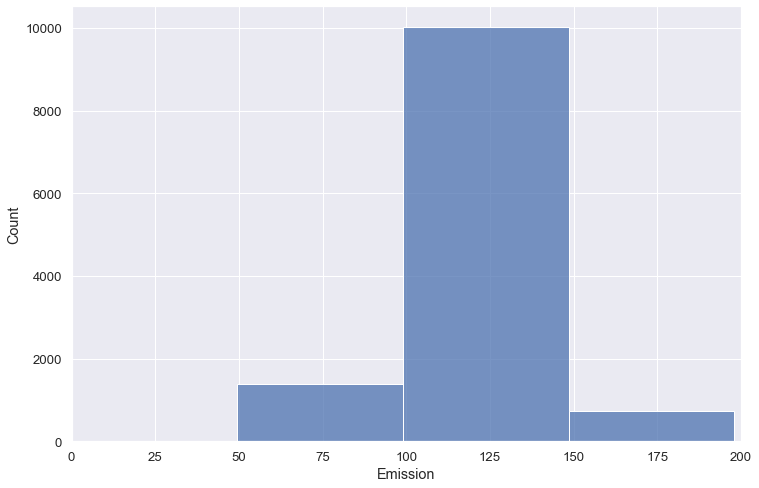

In [91]:
sns.histplot(df["Emission"], bins=20)
plt.xlim(0,200)

In [92]:
df["Emission_Interval"] = pd.cut(df["Emission"],[0,100,120,140,160,200])
df["Emission_Interval"].value_counts(dropna=False)

(100.0, 120.0]    5610
(120.0, 140.0]    3206
NaN               2257
(0.0, 100.0]      1910
(140.0, 160.0]    1214
(160.0, 200.0]     236
Name: Emission_Interval, dtype: int64

In [93]:
fillna_with3column(df,"Model","Fuel","Emission_Interval","Consumption_Comb","mean")

Number of NaN Before mean Function:  1775
NaN          1775
3.900000      684
4.000000      641
5.400000      630
4.400000      606
             ... 
43.000000       1
9.100000        1
5.558188        1
6.407040        1
11.000000       1
Name: Consumption_Comb, Length: 87, dtype: int64
------------------
Number of NaN After mean Function:  1775
NaN          1775
3.900000      684
4.000000      641
5.400000      630
4.400000      606
             ... 
43.000000       1
9.100000        1
5.558188        1
6.407040        1
11.000000       1
Name: Consumption_Comb, Length: 87, dtype: int64
------------------


In [94]:
fillna_with2column(df,"Model","Fuel","Consumption_Comb","mean")

Number of NaN Before mean Function:  1775
NaN          1775
3.900000      684
4.000000      641
5.400000      630
4.400000      606
             ... 
43.000000       1
9.100000        1
5.558188        1
6.407040        1
11.000000       1
Name: Consumption_Comb, Length: 87, dtype: int64
------------------
Number of NaN After mean Function:  1
3.900000    684
4.000000    641
5.400000    630
4.400000    606
5.600000    586
           ... 
6.635863      1
6.179767      1
7.500000      1
6.407040      1
4.360302      1
Name: Consumption_Comb, Length: 106, dtype: int64
------------------


In [95]:
fillna_with1column(df,"Model","Consumption_Comb","mean")

Number of NaN Before ModeFunction:  1
3.900000    684
4.000000    641
5.400000    630
4.400000    606
5.600000    586
           ... 
6.635863      1
6.179767      1
7.500000      1
6.407040      1
4.360302      1
Name: Consumption_Comb, Length: 106, dtype: int64
------------------
Number of NaN After Mode Function:  0
3.900000    684
4.000000    641
5.400000    630
4.400000    606
5.600000    586
           ... 
6.635863      1
6.179767      1
7.500000      1
6.407040      1
4.360302      1
Name: Consumption_Comb, Length: 106, dtype: int64
------------------


In [96]:
df.rename(columns={"Consumption_Comb" : "Consumption"}, inplace=True)

#### Hp

In [97]:
numeric_look("Hp")

----DESCRIBE : --------
count    14350.000000
mean        88.444808
std         26.711531
min          1.000000
25%         66.000000
50%         85.000000
75%        101.000000
max        294.000000
Name: Hp, dtype: float64
----TOTAL NULL : --------
83
----PERCENTAGE OF NULL : --------
% 0.58
----CORELATION : --------
Price                   0.696250
Km                      0.012641
Prev_Owner              0.032125
Door_Total              0.119863
Seat_Total              0.282662
Cylinders               0.276350
Weight                  0.652790
Gears                   0.474784
Consumption             0.201136
Hp                      1.000000
Particulate_Filter      0.148635
Inspection_Situation    0.049454
Warranty                0.076883
Emission                0.464690
Engine_Size             0.604733
Age                     0.087596
Name: Hp, dtype: float64
----VALUE COUNTS : --------
85.0     2303
66.0     1984
81.0     1255
100.0    1228
110.0    1026
         ... 
84.0        1


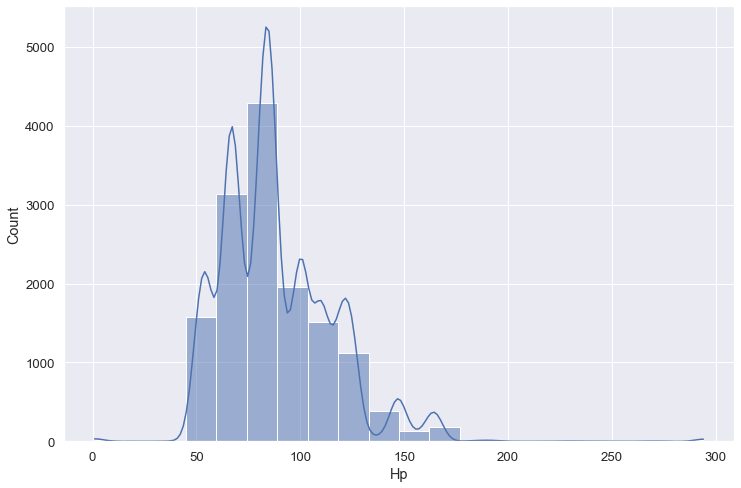

In [98]:
sns.histplot(x="Hp",bins=20, kde=True, data=df);

In [99]:
fillna_with2column(df,"Weight_Interval","Engine_Size","Hp","mean")

Number of NaN Before mean Function:  83
85.0     2303
66.0     1984
81.0     1255
100.0    1228
110.0    1026
         ... 
84.0        1
195.0       1
44.0        1
239.0       1
137.0       1
Name: Hp, Length: 81, dtype: int64
------------------
Number of NaN After mean Function:  1
85.000000     2303
66.000000     1984
81.000000     1255
100.000000    1228
110.000000    1026
              ... 
NaN              1
59.485612        1
92.033237        1
115.980668       1
133.000000       1
Name: Hp, Length: 92, dtype: int64
------------------


In [100]:
fillna_with1column(df,"Weight_Interval","Hp","mean")

Number of NaN Before ModeFunction:  1
85.000000     2303
66.000000     1984
81.000000     1255
100.000000    1228
110.000000    1026
              ... 
NaN              1
59.485612        1
92.033237        1
115.980668       1
133.000000       1
Name: Hp, Length: 92, dtype: int64
------------------
Number of NaN After Mode Function:  0
85.000000     2303
66.000000     1984
81.000000     1255
100.000000    1228
110.000000    1026
              ... 
65.067774        1
59.485612        1
92.033237        1
115.980668       1
133.000000       1
Name: Hp, Length: 92, dtype: int64
------------------


In [101]:
df["Hp_Interval"] = pd.cut(df["Hp"],[0,50,60,70,80,90,100,120,350])
df["Hp_Interval"].value_counts()

(80, 90]      3961
(60, 70]      2867
(100, 120]    1832
(120, 350]    1831
(50, 60]      1740
(90, 100]     1705
(70, 80]       472
(0, 50]         25
Name: Hp_Interval, dtype: int64

#### Inspection_Time

In [102]:
 print("Null values in Inspection_Time column is =  %", round(df["Inspection_Time"].isnull().sum()/df.shape[0]*100,2))

Null values in Inspection_Time column is =  % 77.32


In [103]:
df["Inspection_Time"].sample(10)

11970   NaT
667     NaT
1879    NaT
11708   NaT
2006    NaT
2605    NaT
7957    NaT
15373   NaT
15004   NaT
13613   NaT
Name: Inspection_Time, dtype: datetime64[ns]

In [104]:
df.drop(columns="Inspection_Time", inplace=True)

#### Warranty

In [105]:
numeric_look("Warranty")

----DESCRIBE : --------
count    4307.000000
mean       22.177153
std        16.188106
min         1.000000
25%        12.000000
50%        12.000000
75%        24.000000
max        72.000000
Name: Warranty, dtype: float64
----TOTAL NULL : --------
10126
----PERCENTAGE OF NULL : --------
% 70.16
----CORELATION : --------
Price                   0.191182
Km                      0.290089
Prev_Owner              0.113373
Door_Total              0.027511
Seat_Total              0.064447
Cylinders               0.029912
Weight                  0.056315
Gears                   0.001838
Consumption             0.078962
Hp                      0.071082
Particulate_Filter      0.031027
Inspection_Situation    0.301098
Warranty                1.000000
Emission                0.178748
Engine_Size             0.105365
Age                     0.320912
Name: Warranty, dtype: float64
----VALUE COUNTS : --------
NaN     10126
12.0     2253
24.0     1034
60.0      391
36.0      184
48.0      133
6.0   

In [106]:
#Before getting 0 to 12 (6 month based number) values to warranty corr with price is %19, after changing values it gets %3. And alse its
# percentage of null is %70. So it is droppped
df.loc[df["Warranty"].isnull() , "Warranty"] = 0
x = 0
y= 1
while y < 13:
    df.loc[(df["Warranty"] > x) & (df["Warranty"] < x+7) , "Warranty"] = y
    x += 6
    y += 1


In [107]:
df.drop(columns="Warranty", inplace=True)

#### Emission

In [108]:
numeric_look("Emission")

----DESCRIBE : --------
count    12182.000000
mean       118.117468
std         20.418061
min          0.000000
25%        104.000000
50%        116.000000
75%        129.000000
max        990.000000
Name: Emission, dtype: float64
----TOTAL NULL : --------
2251
----PERCENTAGE OF NULL : --------
% 15.6
----CORELATION : --------
Price                   0.311688
Km                      0.203443
Prev_Owner              0.138166
Door_Total              0.035210
Seat_Total              0.244004
Cylinders               0.321292
Weight                  0.270219
Gears                   0.121465
Consumption             0.519755
Hp                      0.465341
Particulate_Filter      0.120464
Inspection_Situation    0.109199
Emission                1.000000
Engine_Size             0.285740
Age                     0.263652
Name: Emission, dtype: float64
----VALUE COUNTS : --------
NaN       2251
120.00     651
97.00      504
99.00      479
102.00     469
          ... 
990.00       1
1.06        

<AxesSubplot:xlabel='Emission', ylabel='Count'>

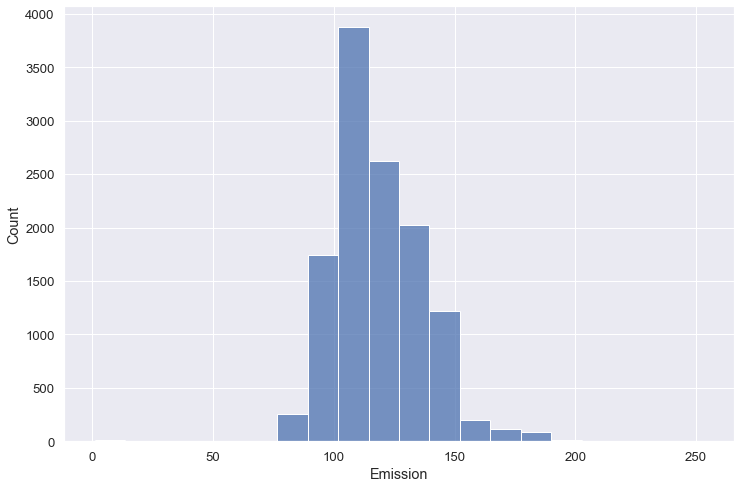

In [109]:
sns.histplot(df[(df["Emission"] > 0) & (df["Emission"]< 300)]["Emission"], bins=20)

In [110]:
fillna_with3column(df,"Model","Fuel","Hp_Interval","Emission","mean")

Number of NaN Before mean Function:  2251
NaN       2251
120.00     651
97.00      504
99.00      479
102.00     469
          ... 
990.00       1
1.06         1
51.00        1
165.00       1
193.00       1
Name: Emission, Length: 123, dtype: int64
------------------
Number of NaN After mean Function:  37
120.000    651
97.000     504
99.000     479
102.000    469
104.000    447
          ... 
184.000      1
14.457       1
13.983       1
181.000      1
193.000      1
Name: Emission, Length: 174, dtype: int64
------------------


In [111]:
fillna_with2column(df,"Fuel","Hp_Interval","Emission","mean")

Number of NaN Before mean Function:  37
120.000    651
97.000     504
99.000     479
102.000    469
104.000    447
          ... 
184.000      1
14.457       1
13.983       1
181.000      1
193.000      1
Name: Emission, Length: 174, dtype: int64
------------------
Number of NaN After mean Function:  18
120.000    651
97.000     504
99.000     479
102.000    469
104.000    447
          ... 
14.457       1
13.983       1
14.000       1
177.000      1
193.000      1
Name: Emission, Length: 177, dtype: int64
------------------


In [112]:
fillna_with1column(df,"Hp_Interval","Emission","mean")

Number of NaN Before ModeFunction:  18
120.000    651
97.000     504
99.000     479
102.000    469
104.000    447
          ... 
14.457       1
13.983       1
14.000       1
177.000      1
193.000      1
Name: Emission, Length: 177, dtype: int64
------------------
Number of NaN After Mode Function:  0
120.0    651
97.0     504
99.0     479
102.0    469
104.0    447
        ... 
184.0      1
165.0      1
239.0      1
51.0       1
193.0      1
Name: Emission, Length: 178, dtype: int64
------------------


In [113]:
df["Emission_Interval"] = pd.cut(df["Emission"],[0,100,120,140,160,200,1000])
df["Emission_Interval"].value_counts(dropna=False)

(100.0, 120.0]     6481
(120.0, 140.0]     4022
(0.0, 100.0]       2232
(140.0, 160.0]     1455
(160.0, 200.0]      237
(200.0, 1000.0]       4
NaN                   2
Name: Emission_Interval, dtype: int64

#### Last Look for Numerical Features 

In [114]:
df.select_dtypes(exclude="O").info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14433 entries, 0 to 15918
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Price                 14433 non-null  float64       
 1   Km                    14433 non-null  float64       
 2   Registration_Date     14433 non-null  datetime64[ns]
 3   Prev_Owner            14433 non-null  float64       
 4   Door_Total            14433 non-null  float64       
 5   Seat_Total            14433 non-null  float64       
 6   Cylinders             14433 non-null  float64       
 7   Weight                14433 non-null  float64       
 8   Gears                 14433 non-null  float64       
 9   Consumption           14433 non-null  float64       
 10  Hp                    14433 non-null  float64       
 11  Particulate_Filter    14433 non-null  int64         
 12  Inspection_Situation  14433 non-null  int64         
 13  Emission        

### Categorical Features 

In [115]:
df.select_dtypes(include="O").info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14433 entries, 0 to 15918
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Model                14433 non-null  object
 1   Body_Type            14387 non-null  object
 2   Vat                  10425 non-null  object
 3   Type                 14431 non-null  object
 4   Body_Color           13920 non-null  object
 5   Paint_Type           9340 non-null   object
 6   Gear_Type            14433 non-null  object
 7   Drive_Chain          8122 non-null   object
 8   Fuel                 14433 non-null  object
 9   Emission_Class       11824 non-null  object
 10  Comfort_Convenience  13665 non-null  object
 11  Entertainment_Media  13277 non-null  object
 12  Extras               11865 non-null  object
 13  Safety_Security      13625 non-null  object
 14  Country              6975 non-null   object
 15  Upholstery_Type      10519 non-null  object
 16  Upho

In [116]:
for i in df.select_dtypes(include="O").columns:
    print(f"Null values in {i} column is =  %", round(df[i].isnull().sum()/df.shape[0]*100,2))

Null values in Model column is =  % 0.0
Null values in Body_Type column is =  % 0.32
Null values in Vat column is =  % 27.77
Null values in Type column is =  % 0.01
Null values in Body_Color column is =  % 3.55
Null values in Paint_Type column is =  % 35.29
Null values in Gear_Type column is =  % 0.0
Null values in Drive_Chain column is =  % 43.73
Null values in Fuel column is =  % 0.0
Null values in Emission_Class column is =  % 18.08
Null values in Comfort_Convenience column is =  % 5.32
Null values in Entertainment_Media column is =  % 8.01
Null values in Extras column is =  % 17.79
Null values in Safety_Security column is =  % 5.6
Null values in Country column is =  % 51.67
Null values in Upholstery_Type column is =  % 27.12
Null values in Upholstery_Color column is =  % 32.38


In [117]:
df.describe(include="O").T

,count,unique,top,freq
Model,14433,9,Audi A3,2813
Body_Type,14387,9,Sedans,7214
Vat,10425,2,VAT deductible,10000
Type,14431,5,Used,10198
Body_Color,13920,16,Black,3459
Paint_Type,9340,3,Metallic,9009
Gear_Type,14433,3,Manual,7333
Drive_Chain,8122,3,front,7967
Fuel,14433,5,Benzine,7746
Emission_Class,11824,5,Euro 6,9699


In [118]:
def categorical_look(column1):
    print("----DESCRIBE : --------")
    print(df[column1].describe())
    print("----TOTAL NULL : --------")
    print(df[column1].isnull().sum())
    print("----PERCENTAGE OF NULL : --------")
    print("%",round(df[column1].isnull().sum() / df.shape[0]*100, 2))
    print("----VALUE COUNTS : --------")
    print(df[column1].value_counts(dropna=False))
    print("----NUMBER OF UNIQUES : --------")
    print(df[column1].nunique())   

#### Body_Type

In [119]:
categorical_look("Body_Type")

----DESCRIBE : --------
count      14387
unique         9
top       Sedans
freq        7214
Name: Body_Type, dtype: object
----TOTAL NULL : --------
46
----PERCENTAGE OF NULL : --------
% 0.32
----VALUE COUNTS : --------
Sedans           7214
Station wagon    3306
Compact          2697
Van               710
Other             284
Transporter        87
Off-Road           56
NaN                46
Coupe              25
Convertible         8
Name: Body_Type, dtype: int64
----NUMBER OF UNIQUES : --------
9


In [120]:
df.groupby(['Model'])['Body_Type'].apply(set)

Model
Audi A1           {Sedans, Other, Station wagon, Coupe, Compact,...
Audi A2                                                  {Off-Road}
Audi A3           {nan, Sedans, Other, Station wagon, Convertibl...
Opel Astra        {nan, Sedans, Other, Station wagon, Coupe, Com...
Opel Corsa        {nan, Sedans, Other, Off-Road, Coupe, Compact,...
Opel Insignia     {nan, Sedans, Other, Station wagon, Coupe, Com...
Renault Clio      {nan, Sedans, Other, Off-Road, Station wagon, ...
Renault Duster                                           {Off-Road}
Renault Espace    {nan, Transporter, Sedans, Other, Station wago...
Name: Body_Type, dtype: object

In [121]:
fillna_with2column(df,"Model","Seat_Total","Body_Type","mode")

Number of NaN Before mode Function:  46
Sedans           7214
Station wagon    3306
Compact          2697
Van               710
Other             284
Transporter        87
Off-Road           56
NaN                46
Coupe              25
Convertible         8
Name: Body_Type, dtype: int64
------------------
Number of NaN After mode Function:  0
Sedans           7233
Station wagon    3310
Compact          2699
Van               731
Other             284
Transporter        87
Off-Road           56
Coupe              25
Convertible         8
Name: Body_Type, dtype: int64
------------------


#### Vat

In [122]:
categorical_look("Vat")

----DESCRIBE : --------
count              10425
unique                 2
top       VAT deductible
freq               10000
Name: Vat, dtype: object
----TOTAL NULL : --------
4008
----PERCENTAGE OF NULL : --------
% 27.77
----VALUE COUNTS : --------
VAT deductible      10000
NaN                  4008
Price negotiable      425
Name: Vat, dtype: int64
----NUMBER OF UNIQUES : --------
2


In [123]:
for i in df.select_dtypes(include="O").columns:
    print("COLUMN NAME : ", i)
    print(df.groupby(i)["Vat"].value_counts(dropna=False))
    print("---"*20)

COLUMN NAME :  Model
Model           Vat             
Audi A1         VAT deductible      1651
                NaN                  665
                Price negotiable      81
Audi A2         VAT deductible         1
Audi A3         VAT deductible      1942
                NaN                  770
                Price negotiable     101
Opel Astra      VAT deductible      1746
                NaN                  536
                Price negotiable      45
Opel Corsa      VAT deductible      1459
                NaN                  555
                Price negotiable      41
Opel Insignia   VAT deductible      1862
                NaN                  502
                Price negotiable      50
Renault Clio    VAT deductible       789
                NaN                  644
                Price negotiable      73
Renault Duster  NaN                   18
                VAT deductible        16
Renault Espace  VAT deductible       534
                NaN                  318
   

Safety_Security                                                                                                                                                                                                                                                                                                                                                                                                                                              Vat             
ABS                                                                                                                                                                                                                                                                                                                                                                                                                                                          VAT deductible      3
                                                                       

In [124]:
for i in ["Prev_Owner","Engine_Size","Cylinders","Fuel"]:
    print("COLUMN NAME : ", i)
    print(df.groupby(i)["Vat"].value_counts(dropna=False))
    print("---"*20)

COLUMN NAME :  Prev_Owner
Prev_Owner  Vat             
0.0         VAT deductible      2390
            NaN                  551
            Price negotiable       5
1.0         VAT deductible      7342
            NaN                 3154
            Price negotiable     334
2.0         NaN                  294
            VAT deductible       263
            Price negotiable      81
3.0         NaN                    9
            VAT deductible         5
            Price negotiable       3
4.0         Price negotiable       2
Name: Vat, dtype: int64
------------------------------------------------------------
COLUMN NAME :  Engine_Size
Engine_Size  Vat             
0.9          VAT deductible       211
             NaN                   89
             Price negotiable       6
1.0          VAT deductible      1798
             NaN                  582
             Price negotiable      66
1.1          VAT deductible       126
             NaN                  118
             Price

In [125]:
df.loc[df["Vat"].isnull(),"Vat"] = "No_Discount"

In [126]:
df[df["Vat"].isnull()]["Prev_Owner"].value_counts() / df["Prev_Owner"].value_counts()

1.0   NaN
0.0   NaN
2.0   NaN
3.0   NaN
4.0   NaN
Name: Prev_Owner, dtype: float64

#### Type

In [127]:
categorical_look("Type")

----DESCRIBE : --------
count     14431
unique        5
top        Used
freq      10198
Name: Type, dtype: object
----TOTAL NULL : --------
2
----PERCENTAGE OF NULL : --------
% 0.01
----VALUE COUNTS : --------
Used              10198
New                1426
Pre-registered     1119
Employee's car      907
Demonstration       781
NaN                   2
Name: Type, dtype: int64
----NUMBER OF UNIQUES : --------
5


In [128]:
df.groupby(["Model", "Type"]).size().unstack().rename(columns={0: "count"}).T

Model,Audi A1,Audi A2,Audi A3,Opel Astra,Opel Corsa,Opel Insignia,Renault Clio,Renault Duster,Renault Espace
Type,,,,,,,,,
Demonstration,128.0,NaN,62.0,161.0,89.0,172.0,72.0,NaN,97.0
Employee's car,179.0,1.0,189.0,151.0,144.0,148.0,64.0,NaN,31.0
New,269.0,NaN,272.0,234.0,128.0,327.0,120.0,18.0,58.0
Pre-registered,131.0,NaN,244.0,116.0,300.0,52.0,167.0,NaN,109.0
Used,1690.0,NaN,2044.0,1665.0,1394.0,1715.0,1083.0,16.0,591.0


In [129]:
fillna_with2column(df,"Km_Interval","Age","Type","mode")

Number of NaN Before mode Function:  2
Used              10198
New                1426
Pre-registered     1119
Employee's car      907
Demonstration       781
NaN                   2
Name: Type, dtype: int64
------------------
Number of NaN After mode Function:  0
Used              10200
New                1426
Pre-registered     1119
Employee's car      907
Demonstration       781
Name: Type, dtype: int64
------------------


#### Body_Color

In [130]:
categorical_look("Body_Color")

----DESCRIBE : --------
count     13920
unique       16
top       Black
freq       3459
Name: Body_Color, dtype: object
----TOTAL NULL : --------
513
----PERCENTAGE OF NULL : --------
% 3.55
----VALUE COUNTS : --------
Black     3459
Grey      3168
White     2989
Silver    1536
Blue      1330
Red        843
NaN        513
Brown      265
Green      145
Beige       98
Yellow      48
Violet      18
Black        6
Bronze       6
Blue         4
Orange       3
Gold         2
Name: Body_Color, dtype: int64
----NUMBER OF UNIQUES : --------
16


In [131]:
(df["Body_Color"] == df["Upholstery_Color"]).value_counts()

False    12172
True      2261
dtype: int64

In [132]:
fillna_with3column(df,"Model","Body_Type","Upholstery_Color", "Body_Color","mode")

Number of NaN Before mode Function:  513
Black     3459
Grey      3168
White     2989
Silver    1536
Blue      1330
Red        843
NaN        513
Brown      265
Green      145
Beige       98
Yellow      48
Violet      18
Black        6
Bronze       6
Blue         4
Orange       3
Gold         2
Name: Body_Color, dtype: int64
------------------
Number of NaN After mode Function:  0
Black     3642
Grey      3438
White     3045
Silver    1536
Blue      1330
Red        843
Brown      265
Green      149
Beige       98
Yellow      48
Violet      18
Black        6
Bronze       6
Blue         4
Orange       3
Gold         2
Name: Body_Color, dtype: int64
------------------


####  Paint_Type

In [133]:
categorical_look("Paint_Type")

----DESCRIBE : --------
count         9340
unique           3
top       Metallic
freq          9009
Name: Paint_Type, dtype: object
----TOTAL NULL : --------
5093
----PERCENTAGE OF NULL : --------
% 35.29
----VALUE COUNTS : --------
Metallic       9009
NaN            5093
Uni/basic       325
Perl effect       6
Name: Paint_Type, dtype: int64
----NUMBER OF UNIQUES : --------
3


In [134]:
df[["Paint_Type","Model","Body_Color","Door_Total"]].sample(50)

,Paint_Type,Model,Body_Color,Door_Total
1773,Metallic,Audi A1,Grey,5.0
15063,Metallic,Renault Espace,Brown,5.0
8188,NaN,Opel Astra,Grey,5.0
15147,Metallic,Renault Espace,Silver,5.0
15064,Metallic,Renault Espace,Black,4.0
8621,Metallic,Opel Corsa,Silver,5.0
11578,NaN,Opel Insignia,White,4.0
10766,NaN,Opel Insignia,White,5.0
9334,NaN,Opel Corsa,Red,5.0
891,NaN,Audi A1,White,5.0


In [135]:
df[df["Door_Total"]<4]["Paint_Type"].value_counts()

Metallic     438
Uni/basic     14
Name: Paint_Type, dtype: int64

In [136]:
df.groupby("Body_Color")["Paint_Type"].value_counts()

Body_Color  Paint_Type 
Beige       Metallic         64
            Uni/basic         2
Black       Metallic       2477
            Uni/basic        63
Blue        Metallic        938
            Uni/basic        17
            Perl effect       1
Bronze      Metallic          3
Brown       Metallic        211
            Perl effect       1
Green       Metallic        111
            Uni/basic         2
Grey        Metallic       2563
            Uni/basic        58
Orange      Metallic          1
Red         Metallic        449
            Uni/basic        20
            Perl effect       1
Silver      Metallic       1334
            Uni/basic        27
Violet      Metallic         13
White       Metallic        811
            Uni/basic       134
            Perl effect       3
Yellow      Metallic         34
            Uni/basic         2
Name: Paint_Type, dtype: int64

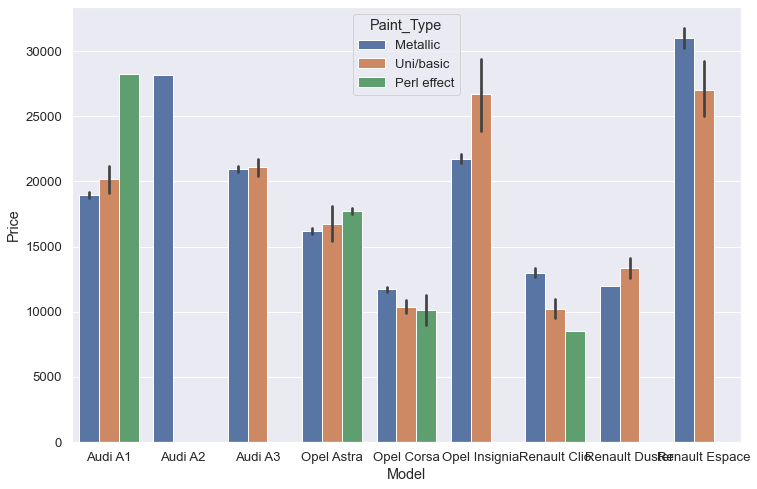

In [137]:
sns.barplot(df["Model"],df["Price"],hue=df["Paint_Type"]);

In [138]:
fillna_with3column(df,"Model","Body_Type","Price_Interval","Paint_Type","mode")

Number of NaN Before mode Function:  5093
Metallic       9009
NaN            5093
Uni/basic       325
Perl effect       6
Name: Paint_Type, dtype: int64
------------------
Number of NaN After mode Function:  0
Metallic       14085
Uni/basic        342
Perl effect        6
Name: Paint_Type, dtype: int64
------------------


#### Drive_Chain

In [139]:
categorical_look("Drive_Chain")

----DESCRIBE : --------
count      8122
unique        3
top       front
freq       7967
Name: Drive_Chain, dtype: object
----TOTAL NULL : --------
6311
----PERCENTAGE OF NULL : --------
% 43.73
----VALUE COUNTS : --------
front    7967
NaN      6311
4WD       151
rear        4
Name: Drive_Chain, dtype: int64
----NUMBER OF UNIQUES : --------
3


In [140]:
df.groupby(["Model","Body_Type"])["Drive_Chain"].value_counts()

Model           Body_Type      Drive_Chain
Audi A1         Compact        front          610
                               4WD              2
                Other          front           11
                Sedans         front          942
                               4WD              1
                                             ... 
Renault Espace  Station wagon  4WD              1
                Transporter    front            6
                               4WD              1
                Van            front          352
                               4WD             23
Name: Drive_Chain, Length: 62, dtype: int64

In [141]:
df.loc[df["Body_Type"] == "Off-Road", "Drive_Chain"] = "4WD"

In [142]:
fillna_with3column(df,"Model","Body_Type","Weight_Interval","Drive_Chain","mode")

Number of NaN Before mode Function:  6269
front    7960
NaN      6269
4WD       200
rear        4
Name: Drive_Chain, dtype: int64
------------------
Number of NaN After mode Function:  0
front    14229
4WD        200
rear         4
Name: Drive_Chain, dtype: int64
------------------


####  Emission_Class

In [143]:
categorical_look("Emission_Class")

----DESCRIBE : --------
count      11824
unique         5
top       Euro 6
freq        9699
Name: Emission_Class, dtype: object
----TOTAL NULL : --------
2609
----PERCENTAGE OF NULL : --------
% 18.08
----VALUE COUNTS : --------
Euro 6     9699
NaN        2609
Euro 6d    1874
Euro 6c     133
Euro 5       78
Euro 4       40
Name: Emission_Class, dtype: int64
----NUMBER OF UNIQUES : --------
5


In [144]:
df.sample(5).T

,2244,4100,10826,15035,2065
Model,Audi A1,Audi A3,Opel Insignia,Renault Espace,Audi A1
Body_Type,Sedans,Sedans,Station wagon,Transporter,Sedans
Price,21000.0,19499.0,12500.0,24900.0,26450.0
Vat,VAT deductible,VAT deductible,Price negotiable,No_Discount,VAT deductible
Km,1.0,28556.0,77500.0,16955.0,15.888889
Registration_Date,2019-05-01 00:00:00,2018-01-01 00:00:00,2017-03-01 00:00:00,2016-05-01 00:00:00,2019-01-01 00:00:00
Prev_Owner,0.0,1.0,1.0,1.0,0.0
Type,Pre-registered,Used,Used,Used,New
Body_Color,Black,Silver,Grey,Grey,Black
Paint_Type,Metallic,Metallic,Metallic,Metallic,Metallic


<AxesSubplot:xlabel='Emission_Class', ylabel='Age'>

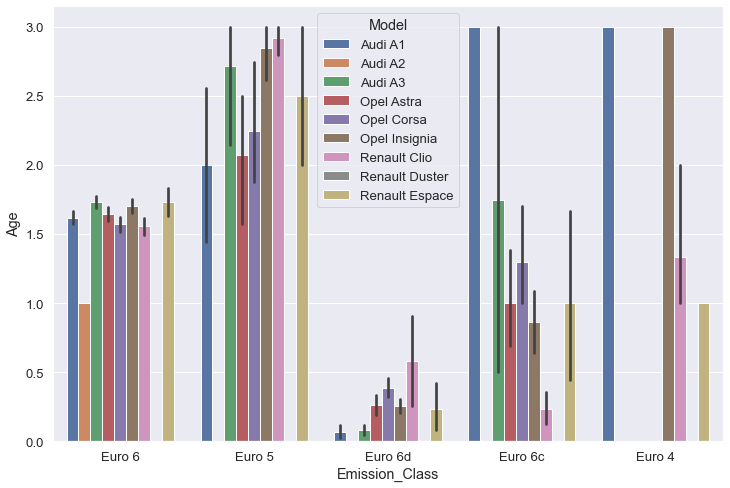

In [145]:
sns.barplot(x="Emission_Class" , y="Age", hue="Model" ,data=df)

In [146]:
fillna_with3column(df,"Model","Age","Emission_Interval","Emission_Class","mode")

Number of NaN Before mode Function:  2609
Euro 6     9699
NaN        2609
Euro 6d    1874
Euro 6c     133
Euro 5       78
Euro 4       40
Name: Emission_Class, dtype: int64
------------------
Number of NaN After mode Function:  0
Euro 6     12026
Euro 6d     2154
Euro 6c      133
Euro 5        78
Euro 4        42
Name: Emission_Class, dtype: int64
------------------


#### Country

In [147]:
categorical_look("Country")

----DESCRIBE : --------
count        6975
unique         23
top       Germany
freq         4033
Name: Country, dtype: object
----TOTAL NULL : --------
7458
----PERCENTAGE OF NULL : --------
% 51.67
----VALUE COUNTS : --------
NaN               7458
Germany           4033
Italy             1028
Netherlands        461
European Union     406
Spain              318
Belgium            314
Austria            203
Czech Republic      50
France              38
Poland              36
Denmark             33
Hungary             28
Japan                8
Croatia              4
Slovakia             3
Sweden               3
Romania              2
Bulgaria             2
Luxembourg           1
Switzerland          1
Slovenia             1
Egypt                1
Serbia               1
Name: Country, dtype: int64
----NUMBER OF UNIQUES : --------
23


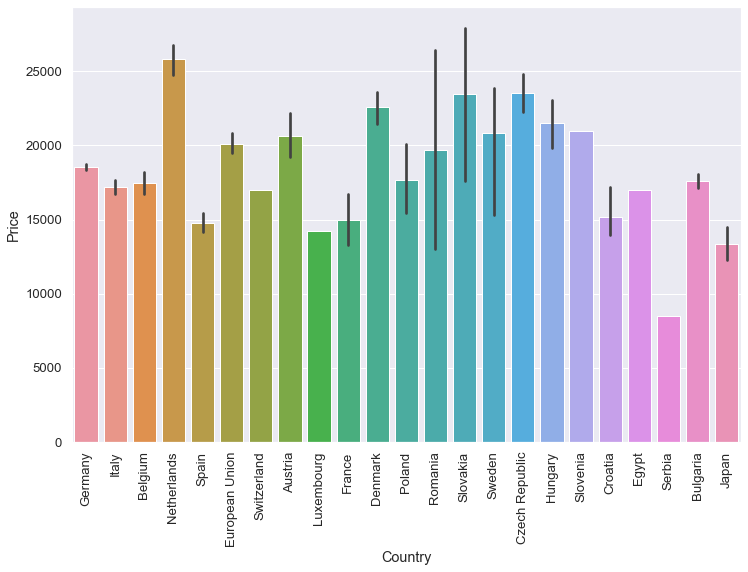

In [148]:
sns.barplot(x="Country" , y="Price",data=df)
plt.xticks(rotation=90);

In [149]:
df.drop(columns="Country", inplace=True)

#### Upholstery_Type

In [150]:
categorical_look("Upholstery_Type")

----DESCRIBE : --------
count     10519
unique        6
top       Cloth
freq       7759
Name: Upholstery_Type, dtype: object
----TOTAL NULL : --------
3914
----PERCENTAGE OF NULL : --------
% 27.12
----VALUE COUNTS : --------
Cloth           7759
NaN             3914
Part leather    1359
Full leather     952
Other            334
Velour            58
alcantara         57
Name: Upholstery_Type, dtype: int64
----NUMBER OF UNIQUES : --------
6


In [151]:
df[df["Upholstery_Type"] != "Cloth"].groupby(["Upholstery_Type","Model","Engine_Size"])["Upholstery_Color"].value_counts().to_frame().tail(50)

Upholstery_Color
Upholstery_Type Model          Engine_Size Upholstery_Color                  
Part leather    Renault Espace 1.6         Black                           35
                                           Brown                           33
                                           Grey                            11
                                            Other                           7
                               1.8         Black                           13
                                            Other                           7
                                           Brown                            7
                               2.0         Black                           14
                                           Brown                            4
                                           White                            1
Velour          Audi A1        1.0         Black                           10
                                           Grey                             1
                               1.4         Black                            3
                                           Grey                             2
                Audi A3        1.0         Grey                             3
                                           Black                            2
                               1.6         Black                            6
                                           Grey                             1
                               2.0         Black                            1
                Opel Astra     1.0         Black                            1
                               1.4         Black                            1
                               1.6         Black                            1
                                           Grey                             1
                Opel Corsa     1.2         Black                            2
                               1.4         Black                            4
                Opel Insignia  1.5         Black                            1
                Renault Clio   1.1         Black                            2
alcantara       Audi A1        1.0         Black                            6
                                           Grey                             1
                               1.4         Black                            9
                               1.6         Black                            1
                Audi A3        1.4         Black                            1
                                           Grey                             1
                               1.5         Black                            1
                               1.6         Black                            3
                                            Other                           1
                               2.0         Black                            2
                                           Grey                             1
                Opel Astra     1.4         Black                            2
                               1.6         Black                            8
                Opel Corsa     1.2         Grey                             1
                               1.4          Other                           1
                Opel Insignia  1.6         Black                            4
                               2.0         Black                            2
                Renault Clio   0.9         Grey                             1
                               1.2         Black                            2
                               1.5         Black                            3
                               1.6         Black                            1
                Renault Espace 1.6         Black                            2
                                           Grey                             1

In [152]:
df["Upholstery_Type"].fillna("Unknown", inplace=True)


####  Upholstery_Color

In [153]:
categorical_look("Upholstery_Color")

----DESCRIBE : --------
count      9760
unique       10
top       Black
freq       7535
Name: Upholstery_Color, dtype: object
----TOTAL NULL : --------
4673
----PERCENTAGE OF NULL : --------
% 32.38
----VALUE COUNTS : --------
Black     7535
NaN       4673
Grey      1056
 Other     874
Brown      201
Beige       51
Blue        16
White       13
Red          9
Yellow       4
Orange       1
Name: Upholstery_Color, dtype: int64
----NUMBER OF UNIQUES : --------
10


In [154]:
df.groupby("Body_Color")["Upholstery_Color"].value_counts()

Body_Color  Upholstery_Color
Beige       Black               41
            Grey                10
             Other               6
            Brown                6
            Beige                2
                                ..
White       Red                  2
            Blue                 1
Yellow      Black               32
            Grey                 6
             Other               1
Name: Upholstery_Color, Length: 71, dtype: int64

In [155]:
df["Upholstery_Color"].fillna("Unknown", inplace=True)

#### Comfort_Convenience & Entertainment_Media & Extras & Safety_Security

In [156]:
categorical_look("Comfort_Convenience")

----DESCRIBE : --------
count                                                 13665
unique                                                 6198
top       Air conditioning,Electrical side mirrors,Hill ...
freq                                                    184
Name: Comfort_Convenience, dtype: object
----TOTAL NULL : --------
768
----PERCENTAGE OF NULL : --------
% 5.32
----VALUE COUNTS : --------
NaN                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  768
Air conditioning,Electrical side mirrors,Hill Holder,Power windows                                         

In [157]:
df_comfort = pd.concat([df["Comfort_Convenience"].str.get_dummies(sep = ","),df["Model"]], axis=1).groupby("Model").sum().T
df_comfort

Model,Audi A1,Audi A2,Audi A3,Opel Astra,Opel Corsa,Opel Insignia,Renault Clio,Renault Duster,Renault Espace
Air conditioning,2230,1,2628,2168,1854,2212,1235,34,739
Air suspension,8,0,19,1,1,8,2,0,23
Armrest,1425,1,1600,1389,36,1786,149,0,362
Automatic climate control,1530,1,1906,1299,284,1981,397,32,686
Auxiliary heating,17,0,93,27,8,58,10,0,19
Cruise control,989,1,1779,2002,1177,2082,1187,0,727
Electric Starter,0,0,0,0,0,1,0,0,0
Electric tailgate,0,0,44,88,1,577,1,0,253
Electrical side mirrors,1827,1,1812,1965,1671,1998,1036,1,639
Electrically adjustable seats,10,0,67,276,11,871,10,0,442


In [158]:
for i in df["Model"].unique():
    count = round(df[df["Model"]==i].dropna()["Comfort_Convenience"].str.split(",").apply(set).transform(lambda x: len(x)).quantile(0.25))
    df.loc[(df["Comfort_Convenience"].isnull()) &( df["Model"] == i),"Comfort_Convenience"] = ",".join(df_comfort[df_comfort[i] != 0][i].sort_values().tail(count).index)
     

In [159]:
# fillna_with3column(df,"Model","Age","Engine_Size","Comfort_Convenience","mode")

In [160]:
categorical_look("Entertainment_Media")

----DESCRIBE : --------
count                                                 13277
unique                                                  346
top       Bluetooth,Hands-free equipment,On-board comput...
freq                                                   1213
Name: Entertainment_Media, dtype: object
----TOTAL NULL : --------
1156
----PERCENTAGE OF NULL : --------
% 8.01
----VALUE COUNTS : --------
Bluetooth,Hands-free equipment,On-board computer,Radio,USB                  1213
NaN                                                                         1156
Bluetooth,Hands-free equipment,MP3,On-board computer,Radio,USB               943
Bluetooth,CD player,Hands-free equipment,MP3,On-board computer,Radio,USB     706
On-board computer,Radio                                                      446
                                                                            ... 
Bluetooth,CD player,Digital radio,Hands-free equipment,Radio                   1
CD player,Hands-free equipme

In [161]:
df_entertainment = pd.concat([df["Entertainment_Media"].str.get_dummies(sep = ","),df["Model"]], axis=1).groupby("Model").sum().T
df_entertainment

Model,Audi A1,Audi A2,Audi A3,Opel Astra,Opel Corsa,Opel Insignia,Renault Clio,Renault Duster,Renault Espace
Bluetooth,1675,1,2239,1800,1441,1876,1011,32,583
CD player,1313,1,1375,368,686,431,144,33,119
Digital radio,210,0,256,325,153,518,291,1,340
Hands-free equipment,1460,1,1621,1588,1085,1609,754,0,472
MP3,1171,1,1177,742,881,754,467,1,241
On-board computer,1659,1,1981,2031,1511,2060,1153,2,517
Radio,2006,1,2323,1811,1593,1795,915,34,534
Sound system,494,0,475,142,111,290,207,0,264
Television,1,0,7,5,3,4,0,0,15
USB,904,1,1145,1401,1167,1564,823,33,425


In [162]:
for i in df["Model"].unique():
    count = round(df[df["Model"]==i].dropna()["Entertainment_Media"].str.split(",").apply(set).transform(lambda x: len(x)).quantile(0.25))
    df.loc[(df["Entertainment_Media"].isnull()) &( df["Model"] == i),"Entertainment_Media"] = ",".join(df_entertainment[df_entertainment[i] != 0][i].sort_values().tail(count).index)
     

In [163]:
# fillna_with3column(df,"Model","Age","Engine_Size","Entertainment_Media","mode")

In [164]:
categorical_look("Extras")

----DESCRIBE : --------
count            11865
unique             659
top       Alloy wheels
freq              2890
Name: Extras, dtype: object
----TOTAL NULL : --------
2568
----PERCENTAGE OF NULL : --------
% 17.79
----VALUE COUNTS : --------
Alloy wheels                                                                                               2890
NaN                                                                                                        2568
Alloy wheels,Touch screen                                                                                   630
Alloy wheels,Voice Control                                                                                  532
Alloy wheels,Touch screen,Voice Control                                                                     511
                                                                                                           ... 
Alloy wheels,Handicapped enabled,Shift paddles                                     

In [165]:
df_extras = pd.concat([df["Extras"].str.get_dummies(sep = ","),df["Model"]], axis=1).groupby("Model").sum().T
df_extras

Model,Audi A1,Audi A2,Audi A3,Opel Astra,Opel Corsa,Opel Insignia,Renault Clio,Renault Duster,Renault Espace
Alloy wheels,1998,1,2468,1367,1165,1932,630,0,756
Cab or rented Car,133,0,72,37,21,43,2,0,2
Catalytic Converter,435,0,338,372,399,365,132,0,78
Handicapped enabled,8,0,18,5,6,3,2,0,10
Right hand drive,0,0,1,1,0,1,0,0,0
Roof rack,4,0,293,852,4,1103,168,1,37
Shift paddles,72,0,126,4,5,147,78,0,18
Ski bag,4,0,40,46,3,135,4,0,12
Sliding door,0,0,1,1,0,1,0,0,0
Sport package,291,0,360,71,64,197,70,0,20


In [166]:
for i in df["Model"].unique():
    count = round(df[df["Model"]==i].dropna()["Extras"].str.split(",").apply(set).transform(lambda x: len(x)).quantile(0.25))
    df.loc[(df["Extras"].isnull()) &( df["Model"] == i),"Extras"] = ",".join(df_extras[df_extras[i] != 0][i].sort_values().tail(count).index)
     

In [167]:
# fillna_with3column(df,"Model","Age","Engine_Size","Extras","mode")

In [168]:
categorical_look("Safety_Security")

----DESCRIBE : --------
count                                                 13625
unique                                                 4443
top       ABS,Central door lock,Daytime running lights,D...
freq                                                    483
Name: Safety_Security, dtype: object
----TOTAL NULL : --------
808
----PERCENTAGE OF NULL : --------
% 5.6
----VALUE COUNTS : --------
NaN                                                                                                                                                                                                                                                                                                                                                                                     808
ABS,Central door lock,Daytime running lights,Driver-side airbag,Electronic stability control,Fog lights,Immobilizer,Isofix,Passenger-side airbag,Power steering,Side airbag,Tire pressure monitoring system,Traction control 

In [169]:
df_safety = pd.concat([df["Safety_Security"].str.get_dummies(sep = ","),df["Model"]], axis=1).groupby("Model").sum().T
df_safety

Model,Audi A1,Audi A2,Audi A3,Opel Astra,Opel Corsa,Opel Insignia,Renault Clio,Renault Duster,Renault Espace
ABS,2055,1,2641,2051,1864,2150,1384,34,780
Adaptive Cruise Control,49,1,432,120,22,400,22,0,195
Adaptive headlights,120,0,262,217,71,1023,102,0,122
Alarm system,278,0,699,212,160,222,179,0,126
Blind spot monitor,11,0,41,156,19,591,3,0,400
Central door lock,1933,1,2264,1996,1714,1973,1198,2,518
Central door lock with remote control,396,0,585,319,372,330,241,0,122
Daytime running lights,1751,1,1362,1747,1469,1789,853,0,502
Driver drowsiness detection,70,0,250,37,2,63,3,0,49
Driver-side airbag,2100,1,2593,2115,1837,2114,1325,34,740


In [170]:
for i in df["Model"].unique():
    count = round(df[df["Model"]==i].dropna()["Safety_Security"].str.split(",").apply(set).transform(lambda x: len(x)).quantile(0.25))
    df.loc[(df["Safety_Security"].isnull()) &( df["Model"] == i),"Safety_Security"] = ",".join(df_safety[df_safety[i] != 0][i].sort_values().tail(count).index)
     

In [171]:
# fillna_with3column(df,"Model","Age","Engine_Size","Safety_Security","mode")

#### Last Look for Categorical Features 

In [172]:
df.select_dtypes(include="O").info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14433 entries, 0 to 15918
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Model                14433 non-null  object
 1   Body_Type            14433 non-null  object
 2   Vat                  14433 non-null  object
 3   Type                 14433 non-null  object
 4   Body_Color           14433 non-null  object
 5   Paint_Type           14433 non-null  object
 6   Gear_Type            14433 non-null  object
 7   Drive_Chain          14433 non-null  object
 8   Fuel                 14433 non-null  object
 9   Emission_Class       14433 non-null  object
 10  Comfort_Convenience  14433 non-null  object
 11  Entertainment_Media  14433 non-null  object
 12  Extras               14433 non-null  object
 13  Safety_Security      14433 non-null  object
 14  Upholstery_Type      14433 non-null  object
 15  Upholstery_Color     14433 non-null  object
dtypes: o

In [173]:
df.to_csv("AutoScout_Zero_NaN")